In [3]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import os
from us import states
from pathlib import Path
%matplotlib inline

# Census & gmaps API Keys
api_key = os.getenv("CENSUS_API_KEY")
mapbox_key = os.getenv("MAPBOX_API_KEY")
c_2018 = Census(api_key, year=2018)
c_2017 = Census(api_key, year=2017)
c_2016 = Census(api_key, year=2016)
c_2015 = Census(api_key, year=2015)
c_2014 = Census(api_key, year=2014)
c_2013 = Census(api_key, year=2013)
c_2012 = Census(api_key, year=2012)
c_2011 = Census(api_key, year=2011)
c_2010 = Census(api_key, year=2010)
c_2009 = Census(api_key, year=2009)
c_2008 = Census(api_key, year=2008)
c_2007 = Census(api_key, year=2007)
c_2006 = Census(api_key, year=2006)
c_2005 = Census(api_key, year=2005)
c_2004 = Census(api_key, year=2004)

# Configure gmaps
# gmaps.configure(api_key=gkey)

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import style
import seaborn as sns
%matplotlib inline

style.use('ggplot')

In [5]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2018 = c_2018.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2018 = pd.DataFrame(census_data_occupation_by_gender_2018)

# Column Reordering
census_occupation_gender_pd_2018 = census_occupation_gender_pd_2018.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2018 = census_occupation_gender_pd_2018[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2018.head()

State County                       Name  Employed_age16+_civilian  \
0    36    061  New York County, New York                  674929.0   
1    36    047     Kings County, New York                  882471.0   
2    36    081    Queens County, New York                  852111.0   
3    36    005     Bronx County, New York                  407073.0   
4    36    085  Richmond County, New York                  162368.0   

   Employed_male  Financial_managers_male  Male_business_operations  \
0       354977.0                  13378.0                   17561.0   
1       459919.0                   3503.0                   14397.0   
2       476331.0                   3902.0                   11448.0   
3       220306.0                   1075.0                    1818.0   
4        90216.0                   1886.0                    2229.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                     22645.0                       6286.0        25158.0   
1                     11139.0                       6925.0        26595.0   
2                     11494.0                       6810.0        16820.0   
3                      2336.0                        956.0         5124.0   
4                      3342.0                       1986.0         4083.0   

   ...  Female_data_scientits  Software_devops_female  \
0  ...                 3479.0                  2287.0   
1  ...                 1833.0                  3085.0   
2  ...                 1862.0                  1021.0   
3  ...                  180.0                   229.0   
4  ...                  388.0                   269.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                     788.0                  102490.0               155369.0   
1                     898.0                   81791.0                95951.0   
2                     253.0                   70033.0                75417.0   
3                      42.0                   48870.0                56600.0   
4                      51.0                   66497.0                90633.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      75746.0         None                None                  None   
1      55517.0         None                None                  None   
2      53848.0         None                None                  None   
3      44457.0         None                None                  None   
4      56397.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [6]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
census_occupation_gender_pd_2018.to_csv("census_occupation_gender_pd_2018.csv", encoding="utf-8", index=False)

In [7]:
census_occupation_gender_pd_2018.to_pickle("census_occupation_gender_pd_2018.pickle")

In [8]:
census_occupation_gender_pd_t2018 = census_occupation_gender_pd_2018.T
census_occupation_gender_pd_t2018.head()

0                       1  \
State                                            36                      36   
County                                          061                     047   
Name                      New York County, New York  Kings County, New York   
Employed_age16+_civilian                     674929                  882471   
Employed_male                                354977                  459919   

                                                2                       3  \
State                                          36                      36   
County                                        081                     005   
Name                      Queens County, New York  Bronx County, New York   
Employed_age16+_civilian                   852111                  407073   
Employed_male                              476331                  220306   

                                                  4  
State                                            36  
County                                          085  
Name                      Richmond County, New York  
Employed_age16+_civilian                     162368  
Employed_male                                 90216

In [9]:
census_occupation_gender_pd_t2018.to_csv("census_occupation_gender_pd_t2018.csv", encoding="utf-8", index=False)

In [10]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2017 = c_2017.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2017 = pd.DataFrame(census_data_occupation_by_gender_2017)

# Column Reordering
census_occupation_gender_pd_2017 = census_occupation_gender_pd_2017.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male Business Operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male Data Scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female Business Operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female Data Scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2017 = census_occupation_gender_pd_2017[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male Business Operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male Data Scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female Business Operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female Data Scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2017.head()

State County                       Name  Employed_age16+_civilian  \
0    36    005     Bronx County, New York                  418442.0   
1    36    047     Kings County, New York                  892721.0   
2    36    061  New York County, New York                  680034.0   
3    36    081    Queens County, New York                  865134.0   
4    36    085  Richmond County, New York                  165503.0   

   Employed_male  Financial_managers_male  Male Business Operations  \
0       220820.0                   1222.0                    3087.0   
1       465883.0                   4861.0                   10673.0   
2       368539.0                  12842.0                   13591.0   
3       492556.0                   3285.0                    9739.0   
4        94401.0                   1157.0                    2064.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                      2950.0                       2124.0         3142.0   
1                     11608.0                       6516.0        24118.0   
2                     28096.0                       9372.0        19746.0   
3                     14777.0                       9616.0        21811.0   
4                      3274.0                       1512.0         4150.0   

   ...  Female Data Scientits  Software_devops_female  \
0  ...                  128.0                   256.0   
1  ...                 1862.0                  3866.0   
2  ...                 2817.0                  1592.0   
3  ...                  493.0                  1731.0   
4  ...                   79.0                   442.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                      52.0                   56132.0                51252.0   
1                     472.0                   76848.0                83993.0   
2                     280.0                   81778.0               152116.0   
3                     189.0                   66725.0                71971.0   
4                       0.0                   81082.0                86126.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      42358.0         None                None                  None   
1      50661.0         None                None                  None   
2      67826.0         None                None                  None   
3      51587.0         None                None                  None   
4      61064.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [11]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
census_occupation_gender_pd_2017.to_csv("census_occupation_gender_pd_2017.csv", encoding="utf-8", index=False)

In [12]:
census_occupation_gender_pd_2017.to_pickle("census_occupation_gender_pd_2017.pickle")

In [13]:
census_occupation_gender_pd_t2017 = census_occupation_gender_pd_2017.T
census_occupation_gender_pd_t2017.head()

0                       1  \
State                                         36                      36   
County                                       005                     047   
Name                      Bronx County, New York  Kings County, New York   
Employed_age16+_civilian                  418442                  892721   
Employed_male                             220820                  465883   

                                                  2                        3  \
State                                            36                       36   
County                                          061                      081   
Name                      New York County, New York  Queens County, New York   
Employed_age16+_civilian                     680034                   865134   
Employed_male                                368539                   492556   

                                                  4  
State                                            36  
County                                          085  
Name                      Richmond County, New York  
Employed_age16+_civilian                     165503  
Employed_male                                 94401

In [14]:
census_occupation_gender_pd_t2017.to_csv("census_occupation_gender_pd_t2017.csv", encoding="utf-8", index=False)

In [15]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2016 = c_2016.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2016 = pd.DataFrame(census_data_occupation_by_gender_2016)

# Column Reordering
census_occupation_gender_pd_2016 = census_occupation_gender_pd_2016.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2016 = census_occupation_gender_pd_2016[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2016.head()

State County                       Name  Employed_age16+_civilian  \
0    36    005     Bronx County, New York                  419838.0   
1    36    047     Kings County, New York                  866784.0   
2    36    061  New York County, New York                  670593.0   
3    36    081    Queens County, New York                  844355.0   
4    36    085  Richmond County, New York                  159593.0   

   Employed_male  Financial_managers_male  Male_business_operations  \
0       227816.0                    772.0                    1826.0   
1       459620.0                   5957.0                    9828.0   
2       360551.0                  13715.0                   13495.0   
3       478943.0                   3827.0                    7392.0   
4        90593.0                    774.0                    1378.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                      3171.0                       1985.0         3734.0   
1                     11162.0                       5343.0        22582.0   
2                     23648.0                       6506.0        21402.0   
3                     12805.0                       7799.0        18655.0   
4                      3704.0                       1950.0         3548.0   

   ...  Female_data_scientits  Software_devops_female  \
0  ...                  228.0                   306.0   
1  ...                 2182.0                  2856.0   
2  ...                 3163.0                  1465.0   
3  ...                 1791.0                  2150.0   
4  ...                   93.0                   355.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                     179.0                   47345.0                56403.0   
1                     697.0                   66775.0                81141.0   
2                     968.0                  101820.0               151280.0   
3                     287.0                   61940.0                68988.0   
4                       0.0                   84643.0                76780.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      36455.0         None                None                  None   
1      50558.0         None                None                  None   
2      61718.0         None                None                  None   
3      46962.0         None                None                  None   
4      60699.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [16]:
census_occupation_gender_pd_2016.to_csv("census_occupation_gender_pd_2016.csv", encoding="utf-8", index=False)

In [17]:
census_occupation_gender_pd_2016.to_pickle("census_occupation_gender_pd_2016.pickle")

In [18]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2015 = c_2015.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2015 = pd.DataFrame(census_data_occupation_by_gender_2015)

# Column Reordering
census_occupation_gender_pd_2015 = census_occupation_gender_pd_2015.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2015 = census_occupation_gender_pd_2015[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2015.head()

State County                       Name  Employed_age16+_civilian  \
0    36    005     Bronx County, New York                  412292.0   
1    36    047     Kings County, New York                  866632.0   
2    36    061  New York County, New York                  664093.0   
3    36    081    Queens County, New York                  839195.0   
4    36    085  Richmond County, New York                  155243.0   

   Employed_male  Financial_managers_male  Male_business_operations  \
0       221150.0                    323.0                    2188.0   
1       459862.0                   5339.0                   11819.0   
2       354913.0                  14337.0                   16888.0   
3       475530.0                   4283.0                    8735.0   
4        86214.0                   1070.0                    1582.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                      2852.0                       1856.0         5192.0   
1                     10096.0                       6447.0        19653.0   
2                     22486.0                       7331.0        21368.0   
3                     13864.0                       8852.0        16614.0   
4                      2924.0                       1308.0         3445.0   

   ...  Female_data_scientits  Software_devops_female  \
0  ...                  146.0                   370.0   
1  ...                  856.0                  3114.0   
2  ...                 1951.0                  2480.0   
3  ...                 1108.0                  2016.0   
4  ...                  105.0                   330.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                     187.0                   49735.0                58408.0   
1                     486.0                   70623.0                82153.0   
2                     258.0                   91561.0               152425.0   
3                     252.0                   61312.0                70638.0   
4                      36.0                   47398.0                80242.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      40829.0         None                None                  None   
1      50572.0         None                None                  None   
2      70052.0         None                None                  None   
3      45906.0         None                None                  None   
4      49748.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [19]:
census_occupation_gender_pd_2015.to_csv("census_occupation_gender_pd_2015.csv", encoding="utf-8", index=False)

In [20]:
census_occupation_gender_pd_2015.to_pickle("census_occupation_gender_pd_2015.pickle")

In [21]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2014 = c_2014.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2014 = pd.DataFrame(census_data_occupation_by_gender_2014)

# Column Reordering
census_occupation_gender_pd_2014 = census_occupation_gender_pd_2014.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2014 = census_occupation_gender_pd_2014[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2014.head()

State County                       Name  Employed_age16+_civilian  \
0    36    005     Bronx County, New York                  402762.0   
1    36    047     Kings County, New York                  843131.0   
2    36    061  New York County, New York                  652237.0   
3    36    081    Queens County, New York                  814682.0   
4    36    085  Richmond County, New York                  151049.0   

   Employed_male  Financial_managers_male  Male_business_operations  \
0       217560.0                   1430.0                    2364.0   
1       449260.0                   4587.0                   10343.0   
2       345271.0                  11858.0                   14888.0   
3       461253.0                   3777.0                    5620.0   
4        83439.0                    841.0                    1407.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                      3252.0                       1847.0         2592.0   
1                     11821.0                       6995.0        18794.0   
2                     21701.0                       6228.0        16973.0   
3                     11948.0                       8018.0        16605.0   
4                      3114.0                       1894.0         2721.0   

   ...  Female_data_scientits  Software_devops_female  \
0  ...                  418.0                   198.0   
1  ...                 1152.0                  2549.0   
2  ...                 1961.0                  2584.0   
3  ...                 1605.0                  1709.0   
4  ...                   32.0                   633.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                      40.0                   51712.0                54105.0   
1                     330.0                   66690.0                76623.0   
2                     356.0                   81318.0               140848.0   
3                     329.0                   58177.0                66506.0   
4                     122.0                   65244.0                75817.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      36967.0         None                None                  None   
1      46028.0         None                None                  None   
2      55872.0         None                None                  None   
3      46267.0         None                None                  None   
4      51686.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [22]:
census_occupation_gender_pd_2014.to_csv("census_occupation_gender_pd_2014.csv", encoding="utf-8", index=False)

In [23]:
census_occupation_gender_pd_2014.to_pickle("census_occupation_gender_pd_2014.pickle")

In [24]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2013 = c_2013.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2013 = pd.DataFrame(census_data_occupation_by_gender_2013)

# Column Reordering
census_occupation_gender_pd_2013 = census_occupation_gender_pd_2013.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2013 = census_occupation_gender_pd_2013[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2013.head()

State County                       Name  Employed_age16+_civilian  \
0    36    005     Bronx County, New York                  383329.0   
1    36    047     Kings County, New York                  824027.0   
2    36    061  New York County, New York                  637580.0   
3    36    081    Queens County, New York                  807808.0   
4    36    085  Richmond County, New York                  159861.0   

   Employed_male  Financial_managers_male  Male_business_operations  \
0       201847.0                    460.0                    2937.0   
1       436115.0                   3085.0                    9672.0   
2       332696.0                  11067.0                   14755.0   
3       458071.0                   4047.0                    5985.0   
4        91404.0                   1180.0                    2127.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                      1974.0                       1540.0         3241.0   
1                     10765.0                       7219.0        17825.0   
2                     23033.0                      11903.0        16732.0   
3                     12428.0                       7609.0        16445.0   
4                      3765.0                       2299.0         2924.0   

   ...  Female_data_scientits  Software_devops_female  \
0  ...                  327.0                     0.0   
1  ...                 1345.0                  2744.0   
2  ...                 1942.0                  3490.0   
3  ...                 1539.0                  2436.0   
4  ...                  372.0                   660.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                     112.0                   47418.0                51529.0   
1                     478.0                   64921.0                71447.0   
2                     678.0                  100581.0               135143.0   
3                     328.0                   61067.0                66168.0   
4                       0.0                   64988.0                85963.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      40117.0         None                None                  None   
1      43710.0         None                None                  None   
2      56643.0         None                None                  None   
3      42583.0         None                None                  None   
4      51220.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [25]:
census_occupation_gender_pd_2013.to_csv("census_occupation_gender_pd_2013.csv", encoding="utf-8", index=False)

In [26]:
census_occupation_gender_pd_2013.to_pickle("census_occupation_gender_pd_2013.pickle")

In [27]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2012 = c_2012.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2012 = pd.DataFrame(census_data_occupation_by_gender_2012)

# Column Reordering
census_occupation_gender_pd_2012 = census_occupation_gender_pd_2012.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2012 = census_occupation_gender_pd_2012[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2012.head()

State County                       Name  Employed_age16+_civilian  \
0    36    005     Bronx County, New York                  381145.0   
1    36    047     Kings County, New York                  811493.0   
2    36    061  New York County, New York                  642187.0   
3    36    081    Queens County, New York                  794231.0   
4    36    085  Richmond County, New York                  154812.0   

   Employed_male  Financial_managers_male  Male_business_operations  \
0       201891.0                    453.0                    2489.0   
1       429221.0                   3948.0                    7477.0   
2       337832.0                   9972.0                   12812.0   
3       452499.0                   4661.0                    6155.0   
4        88871.0                    887.0                    1809.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                      2559.0                       1698.0         3285.0   
1                     10900.0                       7106.0        15452.0   
2                     25304.0                      12736.0        14542.0   
3                     12352.0                       8722.0        14532.0   
4                      2745.0                       1815.0         3051.0   

   ...  Female_data_scientits  Software_devops_female  \
0  ...                  349.0                   313.0   
1  ...                  935.0                  2676.0   
2  ...                 2155.0                  2491.0   
3  ...                 1929.0                  1310.0   
4  ...                  325.0                   746.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                      61.0                   47232.0                46263.0   
1                     637.0                   61247.0                67130.0   
2                     384.0                   81182.0               121952.0   
3                     259.0                   62493.0                61281.0   
4                      82.0                   71715.0                72199.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      37168.0         None                None                  None   
1      42290.0         None                None                  None   
2      60391.0         None                None                  None   
3      45761.0         None                None                  None   
4      50825.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [28]:
census_occupation_gender_pd_2012.to_csv("census_occupation_gender_pd_2012.csv", encoding="utf-8", index=False)

In [29]:
census_occupation_gender_pd_2012.to_pickle("census_occupation_gender_pd_2012.pickle")

In [30]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2011 = c_2011.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2011 = pd.DataFrame(census_data_occupation_by_gender_2011)

# Column Reordering
census_occupation_gender_pd_2011 = census_occupation_gender_pd_2011.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2011 = census_occupation_gender_pd_2011[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2011.head()

State County                       Name  Employed_age16+_civilian  \
0    36    005     Bronx County, New York                  375393.0   
1    36    047     Kings County, New York                  785394.0   
2    36    061  New York County, New York                  605158.0   
3    36    081    Queens County, New York                  769707.0   
4    36    085  Richmond County, New York                  156402.0   

   Employed_male  Financial_managers_male  Male_business_operations  \
0       196145.0                   1037.0                    1655.0   
1       410424.0                   3758.0                    6513.0   
2       320621.0                  10848.0                   14441.0   
3       439634.0                   4310.0                    8442.0   
4        89000.0                    907.0                    1219.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                      3036.0                       1989.0         3083.0   
1                     12407.0                       7540.0        17076.0   
2                     26440.0                       9369.0        10377.0   
3                     12283.0                       9346.0        17178.0   
4                      3572.0                       2475.0         3287.0   

   ...  Female_data_scientits  Software_devops_female  \
0  ...                  191.0                   182.0   
1  ...                 1101.0                  2526.0   
2  ...                 1497.0                  1650.0   
3  ...                  566.0                  2046.0   
4  ...                   75.0                   596.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                      44.0                   51105.0                47753.0   
1                     201.0                   58461.0                66901.0   
2                     669.0                   71553.0               133754.0   
3                     866.0                   60613.0                58618.0   
4                       0.0                   71498.0                65113.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      41363.0         None                None                  None   
1      39610.0         None                None                  None   
2      52790.0         None                None                  None   
3      45048.0         None                None                  None   
4      56311.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [31]:
census_occupation_gender_pd_2011.to_csv("census_occupation_gender_pd_2011.csv", encoding="utf-8", index=False)

In [32]:
census_occupation_gender_pd_2011.to_pickle("census_occupation_gender_pd_2011.pickle")

In [33]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2010 = c_2010.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2010 = pd.DataFrame(census_data_occupation_by_gender_2010)

# Column Reordering
census_occupation_gender_pd_2010 = census_occupation_gender_pd_2010.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2010 = census_occupation_gender_pd_2010[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2010.head()

State County                       Name  Employed_age16+_civilian  \
0    36    005     Bronx County, New York                  382642.0   
1    36    047     Kings County, New York                  793298.0   
2    36    061  New York County, New York                  604865.0   
3    36    081    Queens County, New York                  763128.0   
4    36    085  Richmond County, New York                  151120.0   

   Employed_male  Financial_managers_male  Male_business_operations  \
0       198289.0                    626.0                    1910.0   
1       417076.0                   4226.0                    4825.0   
2       319625.0                   7920.0                   13961.0   
3       431109.0                   4915.0                    6359.0   
4        87562.0                   1358.0                    1532.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                      2922.0                       1528.0         3464.0   
1                     10578.0                       7706.0        14991.0   
2                     22505.0                      10295.0        14842.0   
3                     12474.0                       8278.0        12782.0   
4                      2906.0                       2064.0         3628.0   

   ...  Female_data_scientits  Software_devops_female  \
0  ...                  356.0                   362.0   
1  ...                  733.0                  2111.0   
2  ...                 2044.0                  1090.0   
3  ...                  810.0                  1310.0   
4  ...                  134.0                   765.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                       0.0                   49090.0                45770.0   
1                     585.0                   56023.0                60058.0   
2                     352.0                   82014.0               125112.0   
3                     199.0                   52500.0                61474.0   
4                      80.0                   65619.0                66770.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      39340.0         None                None                  None   
1      41348.0         None                None                  None   
2      42421.0         None                None                  None   
3      42878.0         None                None                  None   
4      70510.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [34]:
census_occupation_gender_pd_2010.to_pickle("census_occupation_gender_pd_2010.pickle")

In [35]:
census_occupation_gender_pd_2010.to_csv("census_occupation_gender_pd_2010.csv", encoding="utf-8", index=False)

## Financial Specialists

In [36]:
employed_df_2018 = pd.DataFrame()

employed_df_2018['Year']= [2018, 2018, 2018, 2018, 2018]
employed_df_2018['Name']=census_occupation_gender_pd_2018['Name']
employed_df_2018['County']=census_occupation_gender_pd_2018['County']
employed_df_2018['Financial_specialists_male']=census_occupation_gender_pd_2018['Financial_specialists_male']
employed_df_2018['Financial_specialists_female']=census_occupation_gender_pd_2018['Financial_specialists_female']

employed_df_2018.head()

Year                       Name County  Financial_specialists_male  \
0  2018  New York County, New York    061                     22645.0   
1  2018     Kings County, New York    047                     11139.0   
2  2018    Queens County, New York    081                     11494.0   
3  2018     Bronx County, New York    005                      2336.0   
4  2018  Richmond County, New York    085                      3342.0   

   Financial_specialists_female  
0                       10456.0  
1                       13903.0  
2                       13281.0  
3                        3640.0  
4                        3495.0

In [37]:
employed_df_2018.set_index(['County','Year', 'Name'], inplace=True)
employed_df_2018

Financial_specialists_male  \
County Year Name                                                    
061    2018 New York County, New York                     22645.0   
047    2018 Kings County, New York                        11139.0   
081    2018 Queens County, New York                       11494.0   
005    2018 Bronx County, New York                         2336.0   
085    2018 Richmond County, New York                      3342.0   

                                       Financial_specialists_female  
County Year Name                                                     
061    2018 New York County, New York                       10456.0  
047    2018 Kings County, New York                          13903.0  
081    2018 Queens County, New York                         13281.0  
005    2018 Bronx County, New York                           3640.0  
085    2018 Richmond County, New York                        3495.0

In [38]:
employed_df_2017 = pd.DataFrame()

employed_df_2017['Year']= [2017, 2017, 2017, 2017, 2017]
employed_df_2017['Name']=census_occupation_gender_pd_2017['Name']
employed_df_2017['County']=census_occupation_gender_pd_2017['County']
employed_df_2017['Financial_specialists_male']=census_occupation_gender_pd_2017['Financial_specialists_male'] #index starts from 0
employed_df_2017['Financial_specialists_female']=census_occupation_gender_pd_2017['Financial_specialists_female']

employed_df_2017

Year                       Name County  Financial_specialists_male  \
0  2017     Bronx County, New York    005                      2950.0   
1  2017     Kings County, New York    047                     11608.0   
2  2017  New York County, New York    061                     28096.0   
3  2017    Queens County, New York    081                     14777.0   
4  2017  Richmond County, New York    085                      3274.0   

   Financial_specialists_female  
0                        3983.0  
1                       11816.0  
2                       10637.0  
3                       13611.0  
4                        2378.0

In [39]:
employed_df_2017.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2017

Financial_specialists_male  \
County Year Name                                                    
005    2017 Bronx County, New York                         2950.0   
047    2017 Kings County, New York                        11608.0   
061    2017 New York County, New York                     28096.0   
081    2017 Queens County, New York                       14777.0   
085    2017 Richmond County, New York                      3274.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2017 Bronx County, New York                           3983.0  
047    2017 Kings County, New York                          11816.0  
061    2017 New York County, New York                       10637.0  
081    2017 Queens County, New York                         13611.0  
085    2017 Richmond County, New York                        2378.0

In [40]:
employed_df_2016 = pd.DataFrame()

employed_df_2016['Year']= [2016, 2016, 2016, 2016, 2016]
employed_df_2016['Name']=census_occupation_gender_pd_2016['Name']
employed_df_2016['County']=census_occupation_gender_pd_2016['County']
employed_df_2016['Financial_specialists_male']=census_occupation_gender_pd_2016['Financial_specialists_male']
employed_df_2016['Financial_specialists_female']=census_occupation_gender_pd_2016['Financial_specialists_female']

employed_df_2016.head()

Year                       Name County  Financial_specialists_male  \
0  2016     Bronx County, New York    005                      3171.0   
1  2016     Kings County, New York    047                     11162.0   
2  2016  New York County, New York    061                     23648.0   
3  2016    Queens County, New York    081                     12805.0   
4  2016  Richmond County, New York    085                      3704.0   

   Financial_specialists_female  
0                        4453.0  
1                       10285.0  
2                       13293.0  
3                       13697.0  
4                        1802.0

In [41]:
employed_df_2016.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2016

Financial_specialists_male  \
County Year Name                                                    
005    2016 Bronx County, New York                         3171.0   
047    2016 Kings County, New York                        11162.0   
061    2016 New York County, New York                     23648.0   
081    2016 Queens County, New York                       12805.0   
085    2016 Richmond County, New York                      3704.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2016 Bronx County, New York                           4453.0  
047    2016 Kings County, New York                          10285.0  
061    2016 New York County, New York                       13293.0  
081    2016 Queens County, New York                         13697.0  
085    2016 Richmond County, New York                        1802.0

In [42]:
employed_df_2015 = pd.DataFrame()

employed_df_2015['Year']= [2015, 2015, 2015, 2015, 2015]
employed_df_2015['Name']=census_occupation_gender_pd_2015['Name']
employed_df_2015['County']=census_occupation_gender_pd_2015['County']
employed_df_2015['Financial_specialists_male']=census_occupation_gender_pd_2015['Financial_specialists_male']
employed_df_2015['Financial_specialists_female']=census_occupation_gender_pd_2015['Financial_specialists_female']

employed_df_2015.head()

Year                       Name County  Financial_specialists_male  \
0  2015     Bronx County, New York    005                      2852.0   
1  2015     Kings County, New York    047                     10096.0   
2  2015  New York County, New York    061                     22486.0   
3  2015    Queens County, New York    081                     13864.0   
4  2015  Richmond County, New York    085                      2924.0   

   Financial_specialists_female  
0                        3929.0  
1                       11658.0  
2                       11651.0  
3                       14109.0  
4                        2988.0

In [43]:
employed_df_2015.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2015

Financial_specialists_male  \
County Year Name                                                    
005    2015 Bronx County, New York                         2852.0   
047    2015 Kings County, New York                        10096.0   
061    2015 New York County, New York                     22486.0   
081    2015 Queens County, New York                       13864.0   
085    2015 Richmond County, New York                      2924.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2015 Bronx County, New York                           3929.0  
047    2015 Kings County, New York                          11658.0  
061    2015 New York County, New York                       11651.0  
081    2015 Queens County, New York                         14109.0  
085    2015 Richmond County, New York                        2988.0

In [44]:
employed_df_2014 = pd.DataFrame()

employed_df_2014['Year']= [2014, 2014, 2014, 2014, 2014]
employed_df_2014['Name']=census_occupation_gender_pd_2014['Name']
employed_df_2014['County']=census_occupation_gender_pd_2014['County']
employed_df_2014['Financial_specialists_male']=census_occupation_gender_pd_2014['Financial_specialists_male']
employed_df_2014['Financial_specialists_female']=census_occupation_gender_pd_2014['Financial_specialists_female']

employed_df_2014.head()

Year                       Name County  Financial_specialists_male  \
0  2014     Bronx County, New York    005                      3252.0   
1  2014     Kings County, New York    047                     11821.0   
2  2014  New York County, New York    061                     21701.0   
3  2014    Queens County, New York    081                     11948.0   
4  2014  Richmond County, New York    085                      3114.0   

   Financial_specialists_female  
0                        3024.0  
1                        8698.0  
2                       14898.0  
3                       13265.0  
4                        1606.0

In [45]:
employed_df_2014.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2014

Financial_specialists_male  \
County Year Name                                                    
005    2014 Bronx County, New York                         3252.0   
047    2014 Kings County, New York                        11821.0   
061    2014 New York County, New York                     21701.0   
081    2014 Queens County, New York                       11948.0   
085    2014 Richmond County, New York                      3114.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2014 Bronx County, New York                           3024.0  
047    2014 Kings County, New York                           8698.0  
061    2014 New York County, New York                       14898.0  
081    2014 Queens County, New York                         13265.0  
085    2014 Richmond County, New York                        1606.0

In [46]:
employed_df_2013 = pd.DataFrame()

employed_df_2013['Year']= [2013, 2013, 2013, 2013, 2013]
employed_df_2013['Name']=census_occupation_gender_pd_2013['Name']
employed_df_2013['County']=census_occupation_gender_pd_2013['County']
employed_df_2013['Financial_specialists_male']=census_occupation_gender_pd_2013['Financial_specialists_male']
employed_df_2013['Financial_specialists_female']=census_occupation_gender_pd_2013['Financial_specialists_female']

employed_df_2013.head()

Year                       Name County  Financial_specialists_male  \
0  2013     Bronx County, New York    005                      1974.0   
1  2013     Kings County, New York    047                     10765.0   
2  2013  New York County, New York    061                     23033.0   
3  2013    Queens County, New York    081                     12428.0   
4  2013  Richmond County, New York    085                      3765.0   

   Financial_specialists_female  
0                        4596.0  
1                       11266.0  
2                       13645.0  
3                       14374.0  
4                        2190.0

In [47]:
employed_df_2013.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2013

Financial_specialists_male  \
County Year Name                                                    
005    2013 Bronx County, New York                         1974.0   
047    2013 Kings County, New York                        10765.0   
061    2013 New York County, New York                     23033.0   
081    2013 Queens County, New York                       12428.0   
085    2013 Richmond County, New York                      3765.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2013 Bronx County, New York                           4596.0  
047    2013 Kings County, New York                          11266.0  
061    2013 New York County, New York                       13645.0  
081    2013 Queens County, New York                         14374.0  
085    2013 Richmond County, New York                        2190.0

In [48]:
employed_df_2012 = pd.DataFrame()

employed_df_2012['Year']= [2012, 2012, 2012, 2012, 2012]
employed_df_2012['Name']=census_occupation_gender_pd_2012['Name']
employed_df_2012['County']=census_occupation_gender_pd_2012['County']
employed_df_2012['Financial_specialists_male']=census_occupation_gender_pd_2012['Financial_specialists_male']
employed_df_2012['Financial_specialists_female']=census_occupation_gender_pd_2012['Financial_specialists_female']

employed_df_2012.head()

Year                       Name County  Financial_specialists_male  \
0  2012     Bronx County, New York    005                      2559.0   
1  2012     Kings County, New York    047                     10900.0   
2  2012  New York County, New York    061                     25304.0   
3  2012    Queens County, New York    081                     12352.0   
4  2012  Richmond County, New York    085                      2745.0   

   Financial_specialists_female  
0                        4782.0  
1                       11310.0  
2                       13628.0  
3                       12281.0  
4                        2989.0

In [49]:
employed_df_2012.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2012

Financial_specialists_male  \
County Year Name                                                    
005    2012 Bronx County, New York                         2559.0   
047    2012 Kings County, New York                        10900.0   
061    2012 New York County, New York                     25304.0   
081    2012 Queens County, New York                       12352.0   
085    2012 Richmond County, New York                      2745.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2012 Bronx County, New York                           4782.0  
047    2012 Kings County, New York                          11310.0  
061    2012 New York County, New York                       13628.0  
081    2012 Queens County, New York                         12281.0  
085    2012 Richmond County, New York                        2989.0

In [50]:
employed_df_2011 = pd.DataFrame()

employed_df_2011['Year']= [2011, 2011, 2011, 2011, 2011]
employed_df_2011['Name']=census_occupation_gender_pd_2011['Name']
employed_df_2011['County']=census_occupation_gender_pd_2011['County']
employed_df_2011['Financial_specialists_male']=census_occupation_gender_pd_2011['Financial_specialists_male']
employed_df_2011['Financial_specialists_female']=census_occupation_gender_pd_2011['Financial_specialists_female']

employed_df_2011.head()

Year                       Name County  Financial_specialists_male  \
0  2011     Bronx County, New York    005                      3036.0   
1  2011     Kings County, New York    047                     12407.0   
2  2011  New York County, New York    061                     26440.0   
3  2011    Queens County, New York    081                     12283.0   
4  2011  Richmond County, New York    085                      3572.0   

   Financial_specialists_female  
0                        4054.0  
1                        9384.0  
2                       13585.0  
3                       12396.0  
4                        1964.0

In [51]:
employed_df_2011.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2011

Financial_specialists_male  \
County Year Name                                                    
005    2011 Bronx County, New York                         3036.0   
047    2011 Kings County, New York                        12407.0   
061    2011 New York County, New York                     26440.0   
081    2011 Queens County, New York                       12283.0   
085    2011 Richmond County, New York                      3572.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2011 Bronx County, New York                           4054.0  
047    2011 Kings County, New York                           9384.0  
061    2011 New York County, New York                       13585.0  
081    2011 Queens County, New York                         12396.0  
085    2011 Richmond County, New York                        1964.0

In [52]:
employed_df_2010 = pd.DataFrame()

employed_df_2010['Year']= [2010, 2010, 2010, 2010, 2010]
employed_df_2010['Name']=census_occupation_gender_pd_2010['Name']
employed_df_2010['County']=census_occupation_gender_pd_2010['County']
employed_df_2010['Financial_specialists_male']=census_occupation_gender_pd_2010['Financial_specialists_male']
employed_df_2010['Financial_specialists_female']=census_occupation_gender_pd_2010['Financial_specialists_female']

employed_df_2010.head()

Year                       Name County  Financial_specialists_male  \
0  2010     Bronx County, New York    005                      2922.0   
1  2010     Kings County, New York    047                     10578.0   
2  2010  New York County, New York    061                     22505.0   
3  2010    Queens County, New York    081                     12474.0   
4  2010  Richmond County, New York    085                      2906.0   

   Financial_specialists_female  
0                        4344.0  
1                       10787.0  
2                       13964.0  
3                       13008.0  
4                        1931.0

In [53]:
employed_df_2010.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2010

Financial_specialists_male  \
County Year Name                                                    
005    2010 Bronx County, New York                         2922.0   
047    2010 Kings County, New York                        10578.0   
061    2010 New York County, New York                     22505.0   
081    2010 Queens County, New York                       12474.0   
085    2010 Richmond County, New York                      2906.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2010 Bronx County, New York                           4344.0  
047    2010 Kings County, New York                          10787.0  
061    2010 New York County, New York                       13964.0  
081    2010 Queens County, New York                         13008.0  
085    2010 Richmond County, New York                        1931.0

In [54]:
#employed_df_2018 = employed_df_2018.set_index.County #now index set to 'County'

#option 1
#keep index of t
#employed_df_2018.index = employed_df_2017.index 

#option 2
#index of employed_df_2017 starts from 0
#employed_df_2017.reset_index(drop=True, inplace=True)

#now concat will keep number of rows 
financial_specialists = pd.concat(
                                    [employed_df_2010, employed_df_2011, employed_df_2012, employed_df_2013, 
                                     employed_df_2014, employed_df_2015, employed_df_2016, employed_df_2017, employed_df_2018], 
                                     join='inner', axis="rows").sort_index() # join rows
financial_specialists

Financial_specialists_male  \
County Year Name                                                    
005    2010 Bronx County, New York                         2922.0   
       2011 Bronx County, New York                         3036.0   
       2012 Bronx County, New York                         2559.0   
       2013 Bronx County, New York                         1974.0   
       2014 Bronx County, New York                         3252.0   
       2015 Bronx County, New York                         2852.0   
       2016 Bronx County, New York                         3171.0   
       2017 Bronx County, New York                         2950.0   
       2018 Bronx County, New York                         2336.0   
047    2010 Kings County, New York                        10578.0   
       2011 Kings County, New York                        12407.0   
       2012 Kings County, New York                        10900.0   
       2013 Kings County, New York                        10765.0   
       2014 Kings County, New York                        11821.0   
       2015 Kings County, New York                        10096.0   
       2016 Kings County, New York                        11162.0   
       2017 Kings County, New York                        11608.0   
       2018 Kings County, New York                        11139.0   
061    2010 New York County, New York                     22505.0   
       2011 New York County, New York                     26440.0   
       2012 New York County, New York                     25304.0   
       2013 New York County, New York                     23033.0   
       2014 New York County, New York                     21701.0   
       2015 New York County, New York                     22486.0   
       2016 New York County, New York                     23648.0   
       2017 New York County, New York                     28096.0   
       2018 New York County, New York                     22645.0   
081    2010 Queens County, New York                       12474.0   
       2011 Queens County, New York                       12283.0   
       2012 Queens County, New York                       12352.0   
       2013 Queens County, New York                       12428.0   
       2014 Queens County, New York                       11948.0   
       2015 Queens County, New York                       13864.0   
       2016 Queens County, New York                       12805.0   
       2017 Queens County, New York                       14777.0   
       2018 Queens County, New York                       11494.0   
085    2010 Richmond County, New York                      2906.0   
       2011 Richmond County, New York                      3572.0   
       2012 Richmond County, New York                      2745.0   
       2013 Richmond County, New York                      3765.0   
       2014 Richmond County, New York                      3114.0   
       2015 Richmond County, New York                      2924.0   
       2016 Richmond County, New York                      3704.0   
       2017 Richmond County, New York                      3274.0   
       2018 Richmond County, New York                      3342.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2010 Bronx County, New York                           4344.0  
       2011 Bronx County, New York                           4054.0  
       2012 Bronx County, New York                           4782.0  
       2013 Bronx County, New York                           4596.0  
       2014 Bronx County, New York                           3024.0  
       2015 Bronx County, New York                           3929.0  
       2016 Bronx County, New York                           4453.0  
       2017 Bronx County, New York                           3983.0  
       2018 Bronx County, New York                           3640.0  
047    2010 Kings County,

In [55]:
financial_specialists_Bronx = financial_specialists.loc[['005']]
financial_specialists_Bronx

Financial_specialists_male  \
County Year Name                                                 
005    2010 Bronx County, New York                      2922.0   
       2011 Bronx County, New York                      3036.0   
       2012 Bronx County, New York                      2559.0   
       2013 Bronx County, New York                      1974.0   
       2014 Bronx County, New York                      3252.0   
       2015 Bronx County, New York                      2852.0   
       2016 Bronx County, New York                      3171.0   
       2017 Bronx County, New York                      2950.0   
       2018 Bronx County, New York                      2336.0   

                                    Financial_specialists_female  
County Year Name                                                  
005    2010 Bronx County, New York                        4344.0  
       2011 Bronx County, New York                        4054.0  
       2012 Bronx County, New York                        4782.0  
       2013 Bronx County, New York                        4596.0  
       2014 Bronx County, New York                        3024.0  
       2015 Bronx County, New York                        3929.0  
       2016 Bronx County, New York                        4453.0  
       2017 Bronx County, New York                        3983.0  
       2018 Bronx County, New York                        3640.0

In [56]:
financial_specialists_Brooklyn = financial_specialists.loc[['047']]
financial_specialists_Brooklyn 

Financial_specialists_male  \
County Year Name                                                 
047    2010 Kings County, New York                     10578.0   
       2011 Kings County, New York                     12407.0   
       2012 Kings County, New York                     10900.0   
       2013 Kings County, New York                     10765.0   
       2014 Kings County, New York                     11821.0   
       2015 Kings County, New York                     10096.0   
       2016 Kings County, New York                     11162.0   
       2017 Kings County, New York                     11608.0   
       2018 Kings County, New York                     11139.0   

                                    Financial_specialists_female  
County Year Name                                                  
047    2010 Kings County, New York                       10787.0  
       2011 Kings County, New York                        9384.0  
       2012 Kings County, New York                       11310.0  
       2013 Kings County, New York                       11266.0  
       2014 Kings County, New York                        8698.0  
       2015 Kings County, New York                       11658.0  
       2016 Kings County, New York                       10285.0  
       2017 Kings County, New York                       11816.0  
       2018 Kings County, New York                       13903.0

In [57]:
financial_specialists_Manhattan = financial_specialists.loc[['061']]
financial_specialists_Manhattan 

Financial_specialists_male  \
County Year Name                                                    
061    2010 New York County, New York                     22505.0   
       2011 New York County, New York                     26440.0   
       2012 New York County, New York                     25304.0   
       2013 New York County, New York                     23033.0   
       2014 New York County, New York                     21701.0   
       2015 New York County, New York                     22486.0   
       2016 New York County, New York                     23648.0   
       2017 New York County, New York                     28096.0   
       2018 New York County, New York                     22645.0   

                                       Financial_specialists_female  
County Year Name                                                     
061    2010 New York County, New York                       13964.0  
       2011 New York County, New York                       13585.0  
       2012 New York County, New York                       13628.0  
       2013 New York County, New York                       13645.0  
       2014 New York County, New York                       14898.0  
       2015 New York County, New York                       11651.0  
       2016 New York County, New York                       13293.0  
       2017 New York County, New York                       10637.0  
       2018 New York County, New York                       10456.0

In [58]:
financial_specialists_Queens = financial_specialists.loc[['081']]
financial_specialists_Queens

Financial_specialists_male  \
County Year Name                                                  
081    2010 Queens County, New York                     12474.0   
       2011 Queens County, New York                     12283.0   
       2012 Queens County, New York                     12352.0   
       2013 Queens County, New York                     12428.0   
       2014 Queens County, New York                     11948.0   
       2015 Queens County, New York                     13864.0   
       2016 Queens County, New York                     12805.0   
       2017 Queens County, New York                     14777.0   
       2018 Queens County, New York                     11494.0   

                                     Financial_specialists_female  
County Year Name                                                   
081    2010 Queens County, New York                       13008.0  
       2011 Queens County, New York                       12396.0  
       2012 Queens County, New York                       12281.0  
       2013 Queens County, New York                       14374.0  
       2014 Queens County, New York                       13265.0  
       2015 Queens County, New York                       14109.0  
       2016 Queens County, New York                       13697.0  
       2017 Queens County, New York                       13611.0  
       2018 Queens County, New York                       13281.0

In [59]:
financial_specialists_Staten_Island = financial_specialists.loc[['085']]
financial_specialists_Staten_Island

Financial_specialists_male  \
County Year Name                                                    
085    2010 Richmond County, New York                      2906.0   
       2011 Richmond County, New York                      3572.0   
       2012 Richmond County, New York                      2745.0   
       2013 Richmond County, New York                      3765.0   
       2014 Richmond County, New York                      3114.0   
       2015 Richmond County, New York                      2924.0   
       2016 Richmond County, New York                      3704.0   
       2017 Richmond County, New York                      3274.0   
       2018 Richmond County, New York                      3342.0   

                                       Financial_specialists_female  
County Year Name                                                     
085    2010 Richmond County, New York                        1931.0  
       2011 Richmond County, New York                        1964.0  
       2012 Richmond County, New York                        2989.0  
       2013 Richmond County, New York                        2190.0  
       2014 Richmond County, New York                        1606.0  
       2015 Richmond County, New York                        2988.0  
       2016 Richmond County, New York                        1802.0  
       2017 Richmond County, New York                        2378.0  
       2018 Richmond County, New York                        3495.0

### Monte Carlo Simulation on Financial Specialists in Manhattan Over 30 Years From 2018

In [60]:
# SOS HERE

# Set start and end datetimes of 1 year, between 2017 and 2018.
#end_date = 2018
# start_date = 2017

#end_date = datetime.now()
#start_date = end_date + timedelta(2)

# Get 1 year's worth of historical data
df = financial_specialists_Manhattan
df

Financial_specialists_male  \
County Year Name                                                    
061    2010 New York County, New York                     22505.0   
       2011 New York County, New York                     26440.0   
       2012 New York County, New York                     25304.0   
       2013 New York County, New York                     23033.0   
       2014 New York County, New York                     21701.0   
       2015 New York County, New York                     22486.0   
       2016 New York County, New York                     23648.0   
       2017 New York County, New York                     28096.0   
       2018 New York County, New York                     22645.0   

                                       Financial_specialists_female  
County Year Name                                                     
061    2010 New York County, New York                       13964.0  
       2011 New York County, New York                       13585.0  
       2012 New York County, New York                       13628.0  
       2013 New York County, New York                       13645.0  
       2014 New York County, New York                       14898.0  
       2015 New York County, New York                       11651.0  
       2016 New York County, New York                       13293.0  
       2017 New York County, New York                       10637.0  
       2018 New York County, New York                       10456.0

In [61]:
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
# df.drop(columns=['', '', '', ''], level=1, inplace=True) # drop columns
#df.head()

In [311]:
# Use the `pct_change` function to calculate daily returns of `TSLA` and `SPHD`.
annual_moves = df.pct_change().fillna(0)
annual_moves

Financial_specialists_male  \
County Year Name                                                    
061    2010 New York County, New York                    0.000000   
       2011 New York County, New York                    0.174850   
       2012 New York County, New York                   -0.042965   
       2013 New York County, New York                   -0.089749   
       2014 New York County, New York                   -0.057830   
       2015 New York County, New York                    0.036173   
       2016 New York County, New York                    0.051677   
       2017 New York County, New York                    0.188092   
       2018 New York County, New York                   -0.194013   

                                       Financial_specialists_female  
County Year Name                                                     
061    2010 New York County, New York                      0.000000  
       2011 New York County, New York                     -0.027141  
       2012 New York County, New York                      0.003165  
       2013 New York County, New York                      0.001247  
       2014 New York County, New York                      0.091829  
       2015 New York County, New York                     -0.217949  
       2016 New York County, New York                      0.140932  
       2017 New York County, New York                     -0.199804  
       2018 New York County, New York                     -0.017016

In [312]:
# Use the `mean` function to calculate the mean of market moves for `male` and `female`, respectively
avg_annual_moves_financial_specialists_male = annual_moves.mean()['Financial_specialists_male']
avg_annual_moves_financial_specialists_female = annual_moves.mean()['Financial_specialists_female']
avg_annual_moves_financial_specialists_male

0.007359420378032018

In [313]:
avg_annual_moves_financial_specialists_female

-0.024970790836429835

In [314]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_specialists_male = annual_moves.std()['Financial_specialists_male']
std_dev_annual_moves_financial_specialists_female = annual_moves.std()['Financial_specialists_female']
std_dev_annual_moves_financial_specialists_female

0.11786840309957754

In [315]:
std_dev_annual_moves_financial_specialists_male

0.12264227455573176

In [649]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_specialists_male_last  = df['Financial_specialists_male'][-1]
financial_specialists_female_last = df['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_employed_df = pd.DataFrame()
employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_male = []
    simulated_financial_specialist_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_male = [financial_specialists_male_last]
    simulated_financial_specialists_female = [financial_specialists_female_last]
    
            
    # Calculate the simulated price using the last price within the list
#    simulated_financial_specialist_male = simulated_financial_specialists_male[-1] * (1 + np.random.normal(avg_annual_moves_financial_specialists_male, std_dev_annual_moves_financial_specialists_male))
#    simulated_financial_specialist_female = simulated_financial_specialists_female[-1] * (1 + np.random.normal(avg_annual_moves_financial_specialists_female, std_dev_annual_moves_financial_specialists_female))

    # Append the simulated price to the list
#    simulated_financial_specialists_male.append(simulated_financial_specialist_male)
#    simulated_financial_specialists_female.append(simulated_financial_specialist_female)

    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_male = simulated_financial_specialists_male[count] * (1 + np.random.normal(avg_annual_moves_financial_specialists_male, std_dev_annual_moves_financial_specialists_male))
        simulated_financial_specialist_female = simulated_financial_specialists_female[count] * (1 + np.random.normal(avg_annual_moves_financial_specialists_female, std_dev_annual_moves_financial_specialists_female))

        simulated_financial_specialists_male.append(simulated_financial_specialist_male)
        simulated_financial_specialists_female.append(simulated_financial_specialist_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_employed_df['Financial_specialists_male'] = simulated_financial_specialists_male
    simulated_employed_df['Financial_specialists_female'] = simulated_financial_specialists_female
    
    # Calculate the daily returns of simulated prices
    simulated_employed_moves = simulated_employed_df.pct_change()
    
    # Set the portfolio weights (50% male; 50% female)
    weights = [0.5, 0.5]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    employed_annual_moves = simulated_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    employed_cumulative_moves[n] = (1 + employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   0.978914  1.002970  0.784961  1.107015  0.902843  0.886802  1.023357   
2   1.062298  1.000680  0.764714  1.156324  0.924795  0.897972  0.999395   
3   0.935637  0.990461  0.814167  1.188259  0.890448  0.928178  0.916381   
4   1.017716  1.105329  0.819293  1.074085  0.876823  0.945957  0.924114   
5   1.094311  1.139498  0.860108  1.014687  0.920572  1.015924  0.955496   
6   1.184586  1.226150  0.847118  1.099219  0.954502  0.918558  0.923001   
7   1.201456  1.137699  0.801290  0.975212  0.832953  1.021686  0.940149   
8   0.941139  1.127562  0.760627  1.012743  0.804524  0.967072  0.980077   
9   1.046537  1.043952  0.708986  1.085897  0.683079  0.849636  0.891514   
10  1.047192  1.067941  0.742795  0.921334  0.575162  0.801308  0.874535   
11  1.105486  0.958296  0.859565  0.842589  0.549296  0.765066  0.996426   
12  1.154676  1.025114  0.838033  0.808925  0.572759  0.834795  0.995451   
13  1.248360  0.947324  0.870775  0.901052  0.628210  0.872735  1.041604   
14  1.202963  0.777230  0.833754  0.960684  0.518691  0.931529  1.058884   
15  1.147300  0.764684  0.775412  1.009812  0.543743  0.944933  0.991371   
16  1.058768  0.754128  0.760059  0.862156  0.553226  0.873551  0.906530   
17  1.024154  0.716357  0.809399  0.888668  0.548797  0.928926  0.957159   
18  0.954933  0.696293  0.757132  0.894126  0.475867  0.972053  1.028748   
19  0.964554  0.698975  0.742873  0.921495  0.447257  1.003298  1.092362   
20  0.876456  0.760393  0.786297  0.921614  0.423917  1.051085  0.991799   
21  0.913486  0.733448  0.652117  1.000316  0.437948  1.072296  1.012276   
22  0.914703  0.720665  0.607967  0.929828  0.438696  0.967864  1.024309   
23  1.002212  0.703129  0.657348  1.020655  0.393232  0.944723  0.943906   
24  0.954408  0.703613  0.702192  1.132918  0.369533  1.034712  0.926096   
25  0.908905  0.713971  0.671144  1.215305  0.376819  1.009641  0.915897   
26  0.766221  0.682601  0.642675  1.313076  0.407710  1.081314  0.804852   
27  0.682955  0.726596  0.584656  1.389750  0.405187  1.092128  0.858986   
28  0.703866  0.731837  0.602832  1.275263  0.415781  1.128750  0.998493   
29  0.761237  0.753615  0.584604  1.181553  0.396122  1.136806  1.238246   
30  0.651613  0.680535  0.500703  1.085368  0.384135  1.012919  1.317673   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.915422  0.843967  1.014205  ...  1.057944  0.989213  1.039598  0.898209   
2   0.853771  0.950098  1.002415  ...  1.037118  0.790438  1.094851  0.723332   
3   0.765435  0.930543  1.075816  ...  1.130309  0.880331  0.882482  0.611036   
4   0.761434  0.903491  1.059473  ...  1.207908  0.849698  0.896870  0.648098   
5   0.720157  0.952544  1.142188  ...  1.181239  0.779406  0.975077  0.556510   
6   0.646540  1.045984  1.087640  ...  1.121478  0.922326  1.031417  0.683688   
7   0.675201  1.058273  1.146114  ...  1.163049  1.015094  1.164100  0.626356   
8   0.706263  1.121529  1.052473  ...  1.014394  0.816679  1.186519  0.573403   
9   0.722727  1.138277  1.072617  ...  0.939244  0.810706  1.002085  0.702432   
10  0.771376  1.155908  0.950906  ...  0.888141  0.848347  0.978377  0.618093   
11  0.667100  1.169582  1.094582  ...  0.798456  0.863836  0.897075  0.650748   
12  0.676178  1.147123  1.030234  ...  0.844822  0.958484  0.966299  0.622373   
13  0.680724  1.013359  1.045311  ...  0.860721  0.849608  0.943444  0.612674   
14  0.584782  0.919443  1.123216  ...  0.654221  0.960594  1.103521  0.575727   
15  0.611650  0.881051  0.951486  ...  0.635690  0.992177  1.106928  0.522679   
16  0.645444  0.831633  0.900643  ...  0.593049  1.105677  1.017070  0.534905   
17  0.628201  0.780416  0.851422  ...  0.545764  0.917685  1.135797  0.521338   
18  0.519027  0.703709  0.790113  ...

<Figure size 432x288 with 0 Axes>

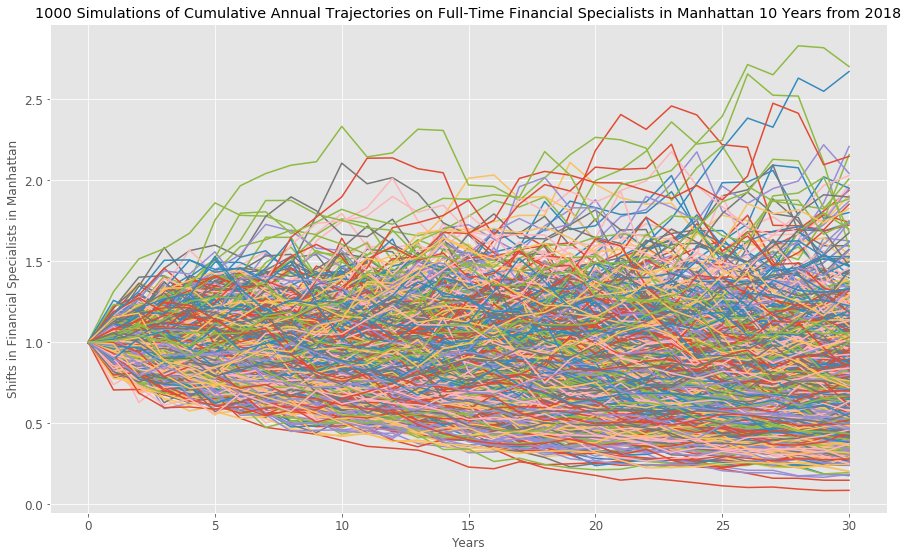

In [650]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Manhattan 10 Years from 2018"
employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Shifts in Financial Specialists in Manhattan')
plt.show()

In [651]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves = employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves.head()

0    0.651613
1    0.680535
2    0.500703
3    1.085368
4    0.384135
Name: 30, dtype: float64

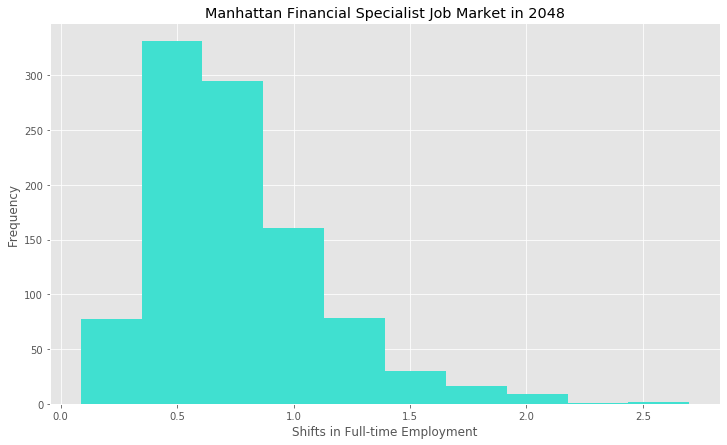

In [653]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_manhattan = plt.figure()
ending_cumulative_moves.plot(kind='hist', bins=10, color = 'turquoise', 
                             title='Manhattan Financial Specialist Job Market in 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [654]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative return ranges
ending_cumulative_moves.value_counts(bins=10) / len(ending_cumulative_moves)

(0.347, 0.609]     0.331
(0.609, 0.87]      0.295
(0.87, 1.131]      0.161
(1.131, 1.393]     0.078
(0.0824, 0.347]    0.077
(1.393, 1.654]     0.030
(1.654, 1.915]     0.016
(1.915, 2.177]     0.009
(2.438, 2.699]     0.002
(2.177, 2.438]     0.001
Name: 30, dtype: float64

In [655]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval = ending_cumulative_moves.quantile(q=[0.025, 0.975])
confidence_interval

0.025    0.279525
0.975    1.697237
Name: 30, dtype: float64

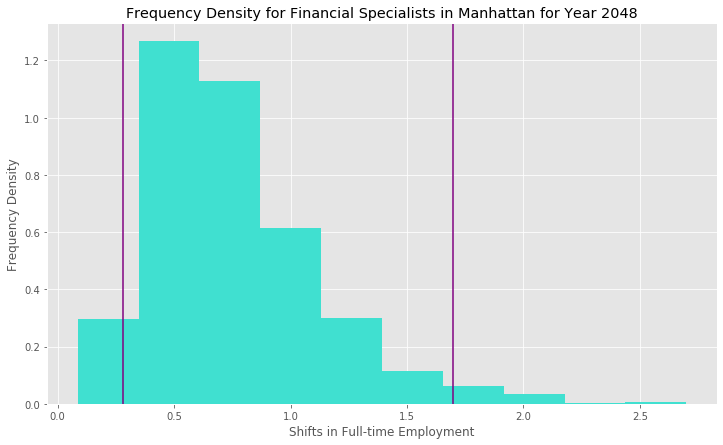

In [657]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves = plt.figure()
ending_cumulative_moves.plot(kind='hist', density=True, bins=10, color = 'turquoise', 
                             title='Frequency Density for Financial Specialists in Manhattan for Year 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval.iloc[0], color='purple')
plt.axvline(confidence_interval.iloc[1], color='purple')
plt.show()

In [848]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves = employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves.head()

0    1.105486
1    0.958296
2    0.859565
3    0.842589
4    0.549296
Name: 11, dtype: float64

In [849]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative return ranges
tenth_cumulative_moves.value_counts(bins=10) / len(ending_cumulative_moves)

(0.714, 0.893]    0.289
(0.893, 1.071]    0.222
(0.536, 0.714]    0.205
(1.071, 1.25]     0.145
(1.25, 1.428]     0.066
(0.355, 0.536]    0.038
(1.428, 1.607]    0.023
(1.607, 1.785]    0.008
(1.964, 2.142]    0.003
(1.785, 1.964]    0.001
Name: 11, dtype: float64

In [850]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval = tenth_cumulative_moves.quantile(q=[0.025, 0.975])
tenth_confidence_interval

0.025    0.504678
0.975    1.489110
Name: 11, dtype: float64

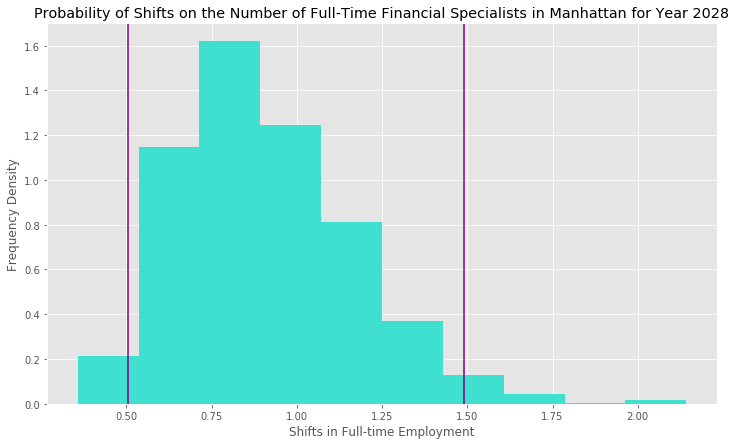

In [857]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
hist_tenth_cum_moves = plt.figure()
tenth_cumulative_moves.plot(kind='hist', density=True, bins=10, color = 'turquoise', 
                             title='Probability of Shifts on the Number of Full-Time Financial Specialists in Manhattan for Year 2028', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval.iloc[0], color='purple')
plt.axvline(tenth_confidence_interval.iloc[1], color='purple')
plt.show()

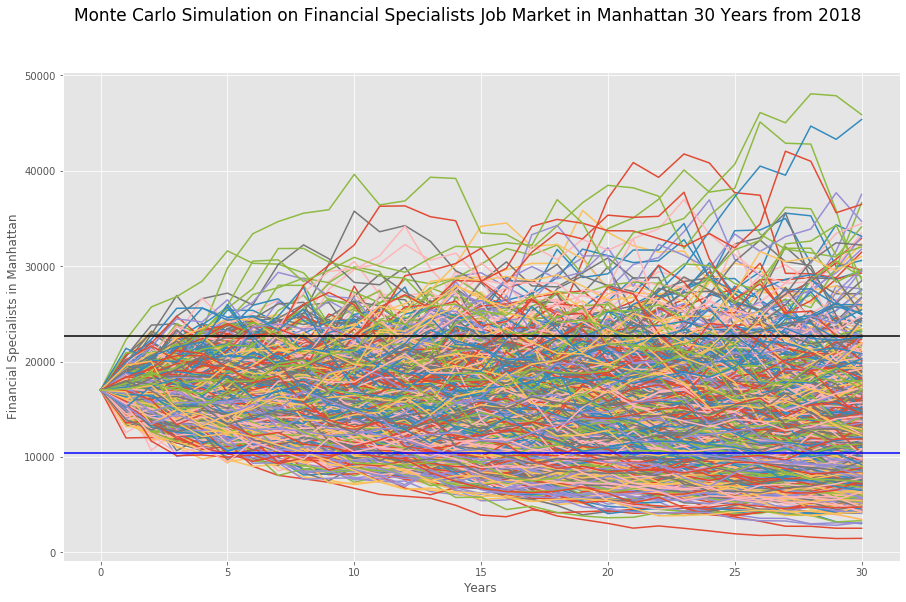

In [658]:
fig_finance = plt.figure(figsize=(15,9))
fig_finance.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Manhattan 30 Years from 2018', fontsize=17)
plt.plot(employed_cumulative_moves*17_000)
plt.axhline(y = financial_specialists_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_specialists_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Manhattan')
plt.show()

In [663]:
# Set initial investment
initial_employment = 17000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound = initial_employment * confidence_interval.iloc[0]
employment_gnl_upper_bound = initial_employment * confidence_interval.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of 17,000 in financial specialists"
      f" in Manhattan 30 years from 2018 will end within in the range of"
      f" {employment_gnl_lower_bound:,.0f} and {employment_gnl_upper_bound:,.0f}.")

There is a 95% chance that an initial employment of 17,000 in financial specialists in Manhattan 30 years from 2018 will end within in the range of 4,752 and 28,853.


In [664]:
employed_trajectories = 17_000*employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories

Lower 5%        Median      Upper 5%
0   17000.000000  17000.000000  17000.000000
1   14592.084254  16848.985256  19203.371127
2   13737.943424  16642.481101  20289.909433
3   12796.259670  16369.961288  21163.269202
4   12240.610629  16191.610494  21479.890032
5   11629.629421  15895.677001  22095.970501
6   11308.787110  15818.268489  22716.608073
7   10862.522055  15741.805208  22671.988653
8   10490.668947  15554.469835  22246.886776
9   10125.313081  15446.143499  22527.024873
10   9704.532501  15052.857871  22818.077885
11   9554.117294  14899.974168  23333.740068
12   9129.776328  14654.204105  23193.729280
13   8976.282708  14443.499234  24031.246489
14   8622.895890  14281.574017  24358.932332
15   8198.785188  13970.041344  24371.129202
16   7904.541774  13914.356258  23612.378486
17   7471.718213  13759.581123  23939.929527
18   7261.306740  13508.159911  24201.229780
19   7028.905814  13358.875719  24051.191354
20   6656.259184  13325.069097  23933.600401
21   6729.923039  13072.670680  24099.867367
22   6605.904814  12793.060403  24186.874103
23   6542.184101  12634.131229  24159.551728
24   6388.636998  12396.927003  23958.165422
25   6397.509630  12254.391838  24042.661070
26   6151.851069  12138.951725  24121.687778
27   6031.539669  12028.737706  24097.994251
28   5722.006742  11951.046014  24204.049511
29   5531.249810  11846.161811  24321.134758
30   5498.993872  11784.791558  24558.232369

<Figure size 432x288 with 0 Axes>

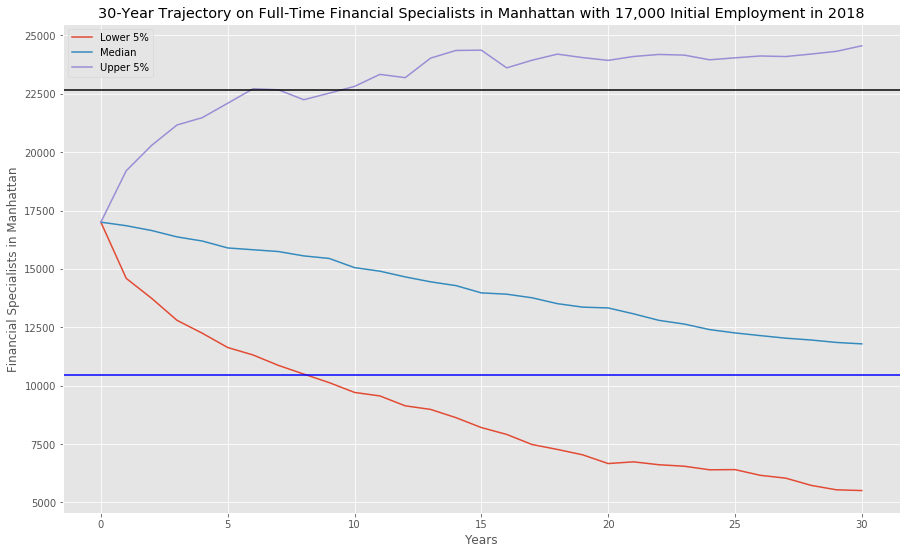

In [665]:
ax_cum_employed = plt.figure()
employed_trajectories.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Manhattan with 17,000 Initial Employment in 2018",
                          figsize=(15, 9)),
plt.axhline(y = financial_specialists_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_specialists_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Manhattan')
plt.show()

#### Manhattan Male Financial Specialist:

### Monte Carlo Simulation on Financial Specialists in Manhattan Over 30 Years From 2018

In [666]:
df_bronx = financial_specialists_Bronx
df_bronx

Financial_specialists_male  \
County Year Name                                                 
005    2010 Bronx County, New York                      2922.0   
       2011 Bronx County, New York                      3036.0   
       2012 Bronx County, New York                      2559.0   
       2013 Bronx County, New York                      1974.0   
       2014 Bronx County, New York                      3252.0   
       2015 Bronx County, New York                      2852.0   
       2016 Bronx County, New York                      3171.0   
       2017 Bronx County, New York                      2950.0   
       2018 Bronx County, New York                      2336.0   

                                    Financial_specialists_female  
County Year Name                                                  
005    2010 Bronx County, New York                        4344.0  
       2011 Bronx County, New York                        4054.0  
       2012 Bronx County, New York                        4782.0  
       2013 Bronx County, New York                        4596.0  
       2014 Bronx County, New York                        3024.0  
       2015 Bronx County, New York                        3929.0  
       2016 Bronx County, New York                        4453.0  
       2017 Bronx County, New York                        3983.0  
       2018 Bronx County, New York                        3640.0

In [667]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_bronx = df_bronx.pct_change().fillna(0)
annual_moves_bronx

Financial_specialists_male  \
County Year Name                                                 
005    2010 Bronx County, New York                    0.000000   
       2011 Bronx County, New York                    0.039014   
       2012 Bronx County, New York                   -0.157115   
       2013 Bronx County, New York                   -0.228605   
       2014 Bronx County, New York                    0.647416   
       2015 Bronx County, New York                   -0.123001   
       2016 Bronx County, New York                    0.111851   
       2017 Bronx County, New York                   -0.069694   
       2018 Bronx County, New York                   -0.208136   

                                    Financial_specialists_female  
County Year Name                                                  
005    2010 Bronx County, New York                      0.000000  
       2011 Bronx County, New York                     -0.066759  
       2012 Bronx County, New York                      0.179576  
       2013 Bronx County, New York                     -0.038896  
       2014 Bronx County, New York                     -0.342037  
       2015 Bronx County, New York                      0.299272  
       2016 Bronx County, New York                      0.133367  
       2017 Bronx County, New York                     -0.105547  
       2018 Bronx County, New York                     -0.086116

In [668]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_financial_bronx_male = annual_moves_bronx.mean()['Financial_specialists_male']
avg_annual_moves_financial_bronx_female = annual_moves_bronx.mean()['Financial_specialists_female']
avg_annual_moves_financial_bronx_male

0.0013035161272441458

In [669]:
avg_annual_moves_financial_bronx_female

-0.0030153880620906737

In [670]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_bronx_male = annual_moves_bronx.std()['Financial_specialists_male']
std_dev_annual_moves_financial_bronx_female = annual_moves_bronx.std()['Financial_specialists_female']
std_dev_annual_moves_financial_bronx_male

0.26772601992691375

In [671]:
std_dev_annual_moves_financial_bronx_female

0.18742704475765454

In [672]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_bronx_male_last  = df_bronx['Financial_specialists_male'][-1]
financial_bronx_female_last = df_bronx['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_bronx_employed_df = pd.DataFrame()
bronx_employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_bronx_male = []
    simulated_financial_specialist_bronx_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_bronx_male = [financial_bronx_male_last]
    simulated_financial_specialists_bronx_female = [financial_bronx_female_last]
    
            
    # Calculate the simulated price using the last price within the list
#    simulated_financial_specialist_bronx_male = simulated_financial_specialists_bronx_male[-1] * (1 + np.random.normal(avg_annual_moves_financial_bronx_male, std_dev_annual_moves_financial_bronx_male))
#    simulated_financial_specialist_bronx_female = simulated_financial_specialists_bronx_female[-1] * (1 + np.random.normal(avg_annual_moves_financial_bronx_female, std_dev_annual_moves_financial_bronx_female))

    # Append the simulated price to the list
#    simulated_financial_specialists_bronx_male.append(simulated_financial_specialist_bronx_male)
#    simulated_financial_specialists_bronx_female.append(simulated_financial_specialist_bronx_female)

    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_bronx_male = simulated_financial_specialists_bronx_male[count] * (1 + np.random.normal(avg_annual_moves_financial_bronx_male, std_dev_annual_moves_financial_bronx_male))
        simulated_financial_specialist_bronx_female = simulated_financial_specialists_bronx_female[count] * (1 + np.random.normal(avg_annual_moves_financial_bronx_female, std_dev_annual_moves_financial_bronx_female))

        simulated_financial_specialists_bronx_male.append(simulated_financial_specialist_bronx_male)
        simulated_financial_specialists_bronx_female.append(simulated_financial_specialist_bronx_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_bronx_employed_df['Financial_specialists_male'] = simulated_financial_specialists_bronx_male
    simulated_bronx_employed_df['Financial_specialists_female'] = simulated_financial_specialists_bronx_female
    
    # Calculate the daily returns of simulated prices
    simulated_bronx_employed_moves = simulated_bronx_employed_df.pct_change()
    
    # Set the portfolio weights (50% male; 50% female)
    weights = [0.5, 0.5]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    bronx_employed_annual_moves = simulated_bronx_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    bronx_employed_cumulative_moves[n] = (1 + bronx_employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
bronx_employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   1.285389  0.995195  0.931728  1.180105  1.010952  0.800150  1.116292   
2   1.041583  0.864613  0.971293  1.157250  1.038392  0.755443  1.404260   
3   1.036658  0.867424  1.006168  1.121144  1.106946  0.776246  1.236521   
4   1.143301  1.009522  0.859724  1.351076  1.450636  0.532198  1.256552   
5   0.991662  0.859848  0.912440  1.308915  1.549509  0.445951  1.324350   
6   1.064934  0.756681  1.116746  1.397984  1.474328  0.376365  1.833886   
7   1.025288  0.824475  1.405438  1.474011  1.617886  0.364467  1.737222   
8   1.255481  0.510727  1.324841  1.338362  1.427408  0.286406  1.581900   
9   0.992863  0.380069  0.982396  1.240277  1.481884  0.326386  1.421067   
10  1.138826  0.414562  0.857560  1.551614  1.411179  0.406315  1.364085   
11  1.445234  0.380608  0.900677  1.195958  1.990923  0.459465  1.189024   
12  1.288261  0.363468  0.923118  1.290805  2.236333  0.491065  1.368392   
13  1.388723  0.365144  1.124264  1.470544  2.320093  0.431029  1.278719   
14  1.687092  0.364524  0.791890  1.580486  3.001061  0.340797  1.282181   
15  1.975649  0.336936  0.892857  1.855373  2.692403  0.317860  1.432214   
16  2.172014  0.217154  1.023156  2.240951  2.728971  0.288298  1.637280   
17  1.920559  0.204862  0.921682  2.299918  2.518238  0.293209  1.531000   
18  1.352921  0.240350  0.947165  1.720041  2.928238  0.309100  1.622207   
19  1.125240  0.237874  0.820155  2.570656  2.601292  0.265712  1.540946   
20  0.927116  0.193344  0.884368  2.839197  2.701939  0.263191  1.451982   
21  0.791853  0.117429  1.135360  2.357905  2.553573  0.274726  1.491837   
22  0.952717  0.134781  1.128426  2.934259  2.224040  0.295458  1.444059   
23  1.045645  0.113049  1.101259  3.345694  2.134129  0.352335  1.218050   
24  0.685584  0.087295  0.866280  3.389088  1.948841  0.493914  1.190207   
25  0.575512  0.100106  0.971156  2.933024  2.229839  0.601584  1.140906   
26  0.684375  0.099858  0.998650  2.322925  2.051570  0.661945  1.444200   
27  0.737500  0.125732  1.070097  2.453526  1.812690  0.707199  1.634926   
28  0.680455  0.093549  1.360374  2.863626  1.722723  0.698277  1.186721   
29  0.783274  0.099051  1.474224  2.876537  1.880003  0.709750  1.281066   
30  0.756356  0.089758  1.307554  2.382500  1.487127  0.591802  1.392954   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.988350  0.884973  1.113113  ...  1.106764  1.212447  1.076145  0.960336   
2   0.710032  0.863441  0.869061  ...  0.932645  1.061700  1.103668  0.898609   
3   0.763139  0.681416  0.599281  ...  0.956767  1.197060  0.789417  1.291162   
4   0.794252  0.579227  0.417443  ...  1.063745  1.442869  0.872801  0.983560   
5   0.492868  0.565746  0.435109  ...  1.130223  1.801063  1.152051  1.065427   
6   0.561707  0.453770  0.466507  ...  1.094389  2.302450  1.352499  1.007602   
7   0.480661  0.515867  0.492036  ...  1.345953  2.131939  1.049784  0.990577   
8   0.487477  0.458449  0.450078  ...  0.910784  2.514614  0.799739  1.154048   
9   0.543336  0.347425  0.391150  ...  0.776580  2.127310  1.052257  1.220901   
10  0.401758  0.409365  0.410389  ...  0.542294  1.819565  0.871477  1.238521   
11  0.323894  0.359982  0.482623  ...  0.440175  2.026111  0.859100  1.157476   
12  0.264096  0.363428  0.559144  ...  0.379101  1.895800  0.784004  1.045717   
13  0.242850  0.327493  0.618269  ...  0.438760  2.265676  0.874956  0.644527   
14  0.226543  0.259179  0.713836  ...  0.447646  2.413949  1.016391  0.581542   
15  0.235768  0.266872  0.880441  ...  0.400941  2.491791  1.264159  0.671273   
16  0.232289  0.272132  1.009488  ...  0.508476  2.204628  1.615575  0.472426   
17  0.193035  0.221308  0.902955  ...  0.477064  2.525653  1.874139  0.560217   
18  0.161668  0.184519  0.928891  ...

<Figure size 432x288 with 0 Axes>

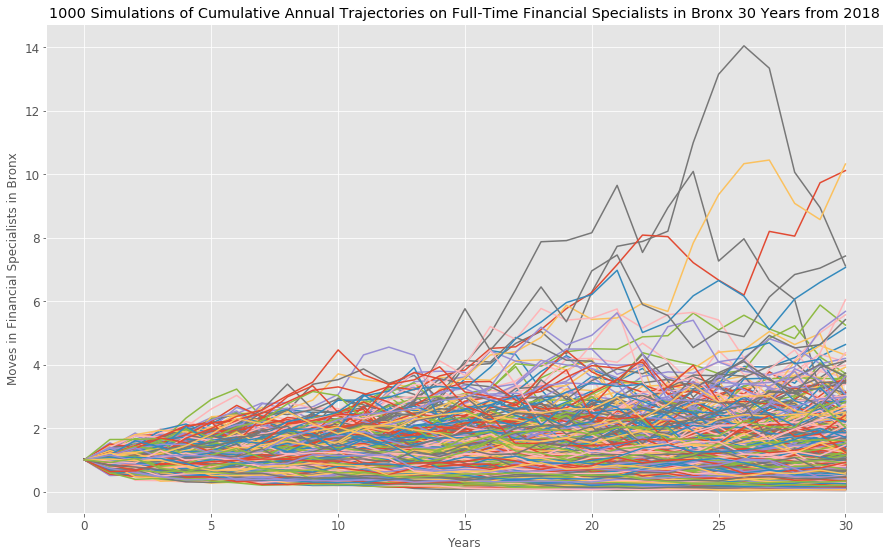

In [682]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_bronx = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Bronx 30 Years from 2018"
bronx_employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Bronx')
plt.show()

In [683]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves_bronx = bronx_employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves_bronx.head()

0    0.756356
1    0.089758
2    1.307554
3    2.382500
4    1.487127
Name: 30, dtype: float64

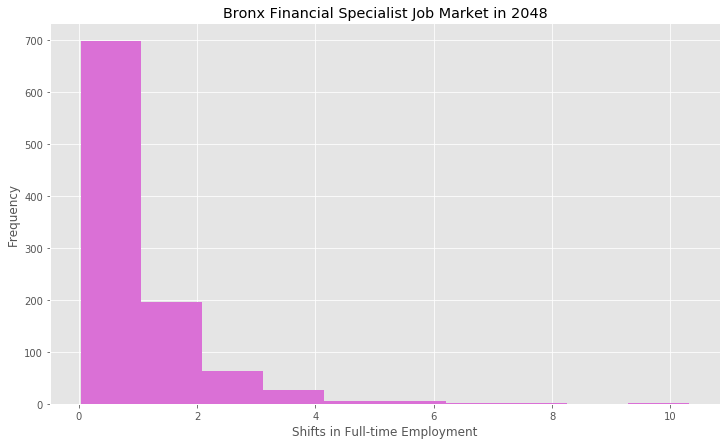

In [684]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_bronx = plt.figure()
ending_cumulative_moves_bronx.plot(kind='hist', bins=10, color = 'orchid', 
                             title='Bronx Financial Specialist Job Market in 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [685]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_bronx = ending_cumulative_moves_bronx.quantile(q=[0.025, 0.975])
confidence_interval_bronx

0.025    0.105706
0.975    3.630292
Name: 30, dtype: float64

In [686]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
ending_cumulative_moves_bronx.value_counts(bins=10) / len(ending_cumulative_moves_bronx)

(0.0208, 1.061]    0.698
(1.061, 2.089]     0.196
(2.089, 3.118]     0.064
(3.118, 4.146]     0.027
(5.175, 6.204]     0.005
(4.146, 5.175]     0.005
(9.289, 10.318]    0.002
(6.204, 7.232]     0.002
(7.232, 8.261]     0.001
(8.261, 9.289]     0.000
Name: 30, dtype: float64

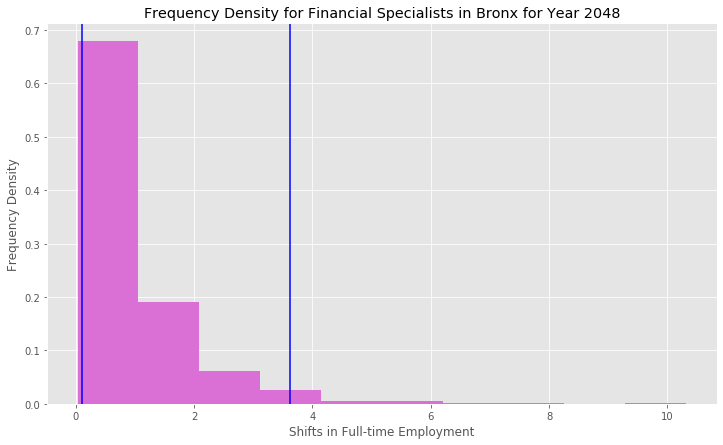

In [687]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves_bronx = plt.figure()
ending_cumulative_moves_bronx.plot(kind='hist', density=True, bins=10, color = 'orchid', 
                             title='Frequency Density for Financial Specialists in Bronx for Year 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_bronx.iloc[0], color='blue')
plt.axvline(confidence_interval_bronx.iloc[1], color='blue')
plt.show()

In [854]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves_bronx = bronx_employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves_bronx.head()

0    1.445234
1    0.380608
2    0.900677
3    1.195958
4    1.990923
Name: 11, dtype: float64

In [855]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval_bronx = tenth_cumulative_moves_bronx.quantile(q=[0.025, 0.975])
tenth_confidence_interval_bronx

0.025    0.267393
0.975    2.433205
Name: 11, dtype: float64

In [856]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
tenth_cumulative_moves_bronx.value_counts(bins=10) / len(tenth_cumulative_moves_bronx)

(0.589, 1.001]                  0.370
(0.17099999999999999, 0.589]    0.239
(1.001, 1.414]                  0.202
(1.414, 1.827]                  0.104
(1.827, 2.239]                  0.043
(2.239, 2.652]                  0.026
(2.652, 3.065]                  0.011
(3.478, 3.89]                   0.003
(3.89, 4.303]                   0.001
(3.065, 3.478]                  0.001
Name: 11, dtype: float64

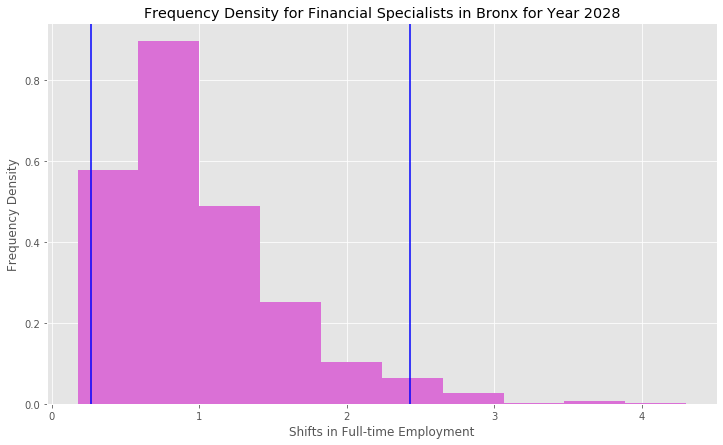

In [858]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_tenth_cum_moves_bronx = plt.figure()
tenth_cumulative_moves_bronx.plot(kind='hist', density=True, bins=10, color = 'orchid', 
                             title='Frequency Density for Financial Specialists in Bronx for Year 2028', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval_bronx.iloc[0], color='blue')
plt.axvline(tenth_confidence_interval_bronx.iloc[1], color='blue')
plt.show()

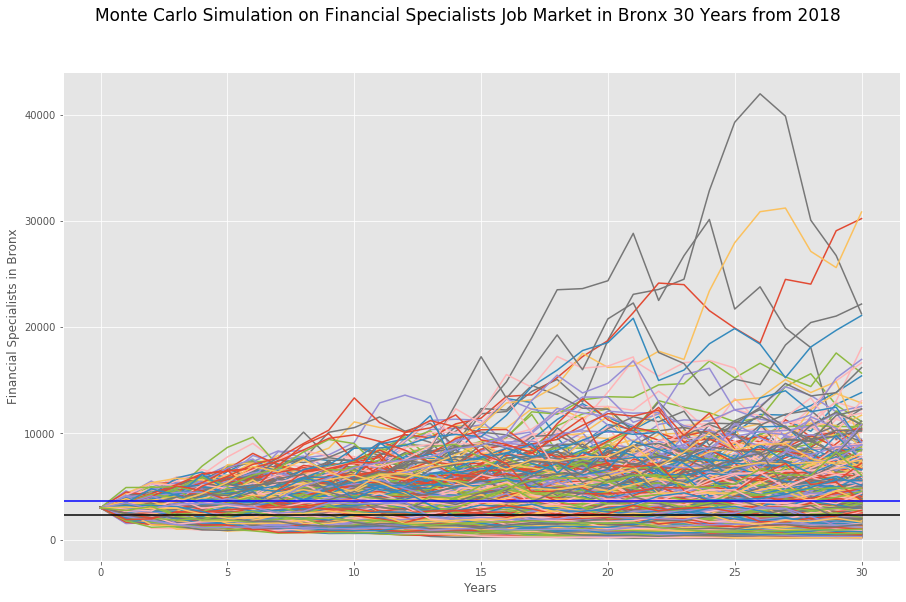

In [688]:
fig_finance_bronx = plt.figure(figsize=(15,9))
fig_finance_bronx.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Bronx 30 Years from 2018', fontsize=17)
plt.plot(bronx_employed_cumulative_moves*2_988)
plt.axhline(y = financial_bronx_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_bronx_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Bronx')
plt.show()

In [689]:
# Set initial investment
initial_employment_bronx = 0.5*(financial_bronx_male_last + financial_bronx_female_last)

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound_bronx = initial_employment_bronx * confidence_interval_bronx.iloc[0]
employment_gnl_upper_bound_bronx = initial_employment_bronx * confidence_interval_bronx.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_bronx:,.0f} in financial specialists"
      f" over the next 30 years will end within in the range of"
      f" {employment_gnl_lower_bound_bronx:,.0f} and {employment_gnl_upper_bound_bronx:,.0f}.")

There is a 95% chance that an initial employment of 2,988 in financial specialists over the next 30 years will end within in the range of 316 and 10,847.


In [690]:
employed_trajectories_bronx = initial_employment_bronx * bronx_employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories_bronx.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories_bronx

Lower 5%       Median     Upper 5%
0   2988.000000  2988.000000  2988.000000
1   2245.385527  2990.561833  3760.008917
2   1998.592112  2981.862823  4247.291659
3   1816.886386  2922.595961  4593.955066
4   1606.874942  2893.659832  4944.551278
5   1470.133788  2849.398783  5202.869308
6   1351.100959  2774.635827  5479.667144
7   1243.556306  2739.751271  5668.069659
8   1188.853593  2706.988747  5711.907859
9   1117.950271  2663.014947  6065.500160
10  1091.586665  2655.032619  6074.740979
11   983.629817  2601.835033  6392.822241
12   922.883587  2524.793048  6417.492510
13   867.451975  2510.743104  6687.075481
14   804.944246  2517.100742  6918.319822
15   791.065367  2456.065729  7147.059525
16   792.167938  2407.108128  7353.717935
17   740.246113  2406.562202  7444.270606
18   716.752623  2355.674108  7389.142974
19   680.346113  2330.371444  7563.247217
20   650.377364  2235.733268  7658.432895
21   641.957335  2249.111558  7721.560953
22   612.307762  2245.732263  8219.216950
23   606.828066  2187.910588  8157.470658
24   561.098879  2183.758312  7918.843738
25   565.144885  2158.339589  8358.637867
26   519.881823  2124.630221  8124.574322
27   499.151449  2117.604608  8626.401109
28   474.333125  2071.385028  8558.717161
29   461.307543  2083.681851  8711.990063
30   453.525013  2018.560515  8882.223776

<Figure size 432x288 with 0 Axes>

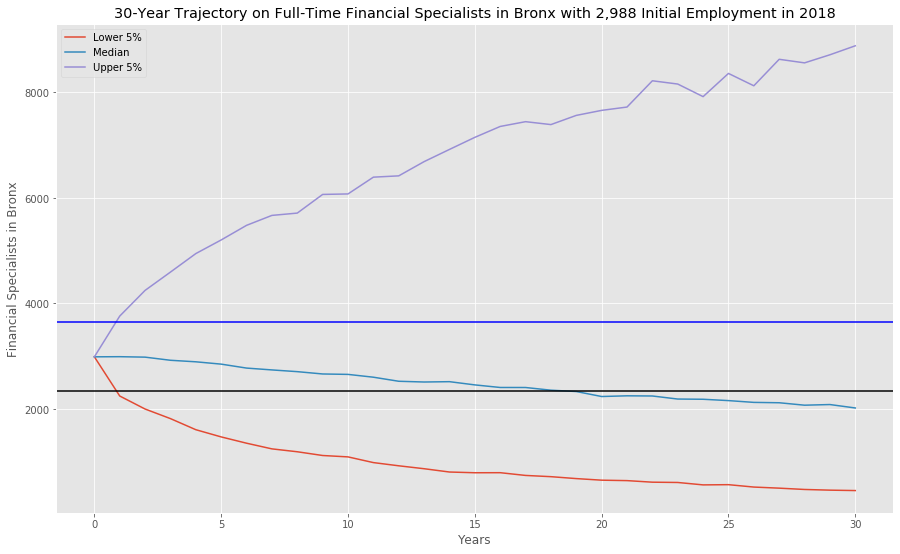

In [692]:
ax_cum_employed_bronx = plt.figure()
employed_trajectories_bronx.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Bronx with 2,988 Initial Employment in 2018",
                          figsize=(15, 9)),
plt.axhline(y = financial_bronx_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_bronx_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Bronx')
plt.show()

### Monte Carlo Simulation on Full-Time Financial Specialists in Brooklyn Over 30 Years Starting from 2018

In [693]:
df_brooklyn = financial_specialists_Brooklyn
df_brooklyn

Financial_specialists_male  \
County Year Name                                                 
047    2010 Kings County, New York                     10578.0   
       2011 Kings County, New York                     12407.0   
       2012 Kings County, New York                     10900.0   
       2013 Kings County, New York                     10765.0   
       2014 Kings County, New York                     11821.0   
       2015 Kings County, New York                     10096.0   
       2016 Kings County, New York                     11162.0   
       2017 Kings County, New York                     11608.0   
       2018 Kings County, New York                     11139.0   

                                    Financial_specialists_female  
County Year Name                                                  
047    2010 Kings County, New York                       10787.0  
       2011 Kings County, New York                        9384.0  
       2012 Kings County, New York                       11310.0  
       2013 Kings County, New York                       11266.0  
       2014 Kings County, New York                        8698.0  
       2015 Kings County, New York                       11658.0  
       2016 Kings County, New York                       10285.0  
       2017 Kings County, New York                       11816.0  
       2018 Kings County, New York                       13903.0

In [694]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_brooklyn = df_brooklyn.pct_change().fillna(0)
annual_moves_brooklyn

Financial_specialists_male  \
County Year Name                                                 
047    2010 Kings County, New York                    0.000000   
       2011 Kings County, New York                    0.172906   
       2012 Kings County, New York                   -0.121464   
       2013 Kings County, New York                   -0.012385   
       2014 Kings County, New York                    0.098096   
       2015 Kings County, New York                   -0.145927   
       2016 Kings County, New York                    0.105586   
       2017 Kings County, New York                    0.039957   
       2018 Kings County, New York                   -0.040403   

                                    Financial_specialists_female  
County Year Name                                                  
047    2010 Kings County, New York                      0.000000  
       2011 Kings County, New York                     -0.130064  
       2012 Kings County, New York                      0.205243  
       2013 Kings County, New York                     -0.003890  
       2014 Kings County, New York                     -0.227942  
       2015 Kings County, New York                      0.340308  
       2016 Kings County, New York                     -0.117773  
       2017 Kings County, New York                      0.148858  
       2018 Kings County, New York                      0.176625

In [695]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_financial_brooklyn_male = annual_moves_brooklyn.mean()['Financial_specialists_male']
avg_annual_moves_financial_brooklyn_female = annual_moves_brooklyn.mean()['Financial_specialists_female']
avg_annual_moves_financial_brooklyn_male

0.01070735087759309

In [696]:
avg_annual_moves_financial_brooklyn_female

0.0434848383701982

In [697]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_brooklyn_male = annual_moves_brooklyn.std()['Financial_specialists_male']
std_dev_annual_moves_financial_brooklyn_female = annual_moves_brooklyn.std()['Financial_specialists_female']
std_dev_annual_moves_financial_brooklyn_male

0.1055144120259476

In [698]:
std_dev_annual_moves_financial_brooklyn_female

0.1860883242930192

In [699]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_brooklyn_male_last  = df_brooklyn['Financial_specialists_male'][-1]
financial_brooklyn_female_last = df_brooklyn['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_brooklyn_employed_df = pd.DataFrame()
brooklyn_employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_brooklyn_male = []
    simulated_financial_specialist_brooklyn_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_brooklyn_male = [financial_brooklyn_male_last]
    simulated_financial_specialists_brooklyn_female = [financial_brooklyn_female_last]
    
            
    # Calculate the simulated price using the last price within the list
 #   simulated_financial_specialist_brooklyn_male = simulated_financial_specialists_brooklyn_male[-1] * (1 + np.random.normal(avg_annual_moves_financial_brooklyn_male, std_dev_annual_moves_financial_brooklyn_male))
 #   simulated_financial_specialist_brooklyn_female = simulated_financial_specialists_brooklyn_female[-1] * (1 + np.random.normal(avg_annual_moves_financial_brooklyn_female, std_dev_annual_moves_financial_brooklyn_female))

    # Append the simulated price to the list
  #  simulated_financial_specialists_brooklyn_male.append(simulated_financial_specialist_brooklyn_male)
  #  simulated_financial_specialists_brooklyn_female.append(simulated_financial_specialist_brooklyn_female)

    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_brooklyn_male = simulated_financial_specialists_brooklyn_male[count] * (1 + np.random.normal(avg_annual_moves_financial_brooklyn_male, std_dev_annual_moves_financial_brooklyn_male))
        simulated_financial_specialist_brooklyn_female = simulated_financial_specialists_brooklyn_female[count] * (1 + np.random.normal(avg_annual_moves_financial_brooklyn_female, std_dev_annual_moves_financial_brooklyn_female))

        simulated_financial_specialists_brooklyn_male.append(simulated_financial_specialist_brooklyn_male)
        simulated_financial_specialists_brooklyn_female.append(simulated_financial_specialist_brooklyn_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_brooklyn_employed_df['Financial_specialists_male'] = simulated_financial_specialists_brooklyn_male
    simulated_brooklyn_employed_df['Financial_specialists_female'] = simulated_financial_specialists_brooklyn_female
    
    # Calculate the daily returns of simulated prices
    simulated_brooklyn_employed_moves = simulated_brooklyn_employed_df.pct_change()
    
    # Set the portfolio weights (50% male; 50% female)
    weights = [0.5, 0.5]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    brooklyn_employed_annual_moves = simulated_brooklyn_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    brooklyn_employed_cumulative_moves[n] = (1 + brooklyn_employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
brooklyn_employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   0.975360  1.117829  1.155674  1.062954  1.161266  0.994267  1.049477   
2   0.982180  0.872730  1.172671  0.862120  1.167094  1.080846  1.089754   
3   0.946073  1.009515  1.090802  0.827026  1.133230  1.106776  0.937378   
4   0.994912  1.001924  0.970606  0.861074  1.239420  1.143957  1.013057   
5   0.971429  0.794854  1.073847  0.970836  1.449023  1.190702  1.036919   
6   1.116281  0.806022  1.040920  1.003408  1.426316  0.983028  1.131450   
7   1.198238  0.826492  1.002469  0.942155  1.259010  1.210081  1.307438   
8   1.080443  0.913627  0.925509  1.031935  1.262183  0.898347  1.152378   
9   1.035427  0.870509  0.872287  1.007420  1.354554  0.890285  1.003679   
10  1.124113  0.909464  0.846826  1.011796  1.348422  0.796508  1.132648   
11  0.987378  0.865945  0.862732  1.242238  1.558927  0.916827  1.072954   
12  1.023499  1.181505  0.876512  1.266518  1.410946  0.969469  1.211924   
13  1.088191  1.166787  0.885169  1.090334  1.292471  1.182661  1.351427   
14  1.211988  1.252706  0.888924  0.918868  1.647963  1.305622  1.260245   
15  1.432922  1.224414  0.689174  0.819803  1.869154  1.332326  1.544783   
16  1.952095  1.303904  0.662256  0.851397  1.661159  1.354617  1.497526   
17  2.176650  1.302357  0.637998  0.704517  1.751634  1.536041  1.481286   
18  2.129159  1.479465  0.708115  0.654829  1.549450  1.283234  1.624021   
19  1.788665  1.518814  0.741210  0.632805  1.429266  1.071461  1.831467   
20  1.810106  1.894226  0.696469  0.583659  1.320917  1.093037  2.007325   
21  1.825390  1.991012  0.799732  0.644383  1.089633  1.162423  2.193057   
22  1.980340  2.065117  0.969187  0.644186  1.067990  1.209067  2.264341   
23  1.855434  2.290198  1.116938  0.545389  1.310006  0.999107  2.919775   
24  1.973961  2.162162  1.053724  0.575387  1.329715  0.952012  3.010431   
25  1.819692  2.343656  1.020021  0.697292  1.097852  1.197541  3.531176   
26  2.159329  2.530635  1.235375  0.768313  1.088004  1.201049  4.116302   
27  2.614804  2.563816  0.980226  0.682821  1.242120  1.141375  4.235713   
28  3.003427  2.753548  0.972920  0.796651  1.325651  1.189917  4.511009   
29  3.992247  2.516347  1.271721  0.855095  1.321331  1.071258  3.830126   
30  4.301525  3.002069  1.440173  0.783159  0.979310  1.265740  3.993242   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.880162  1.053554  0.953805  ...  1.034750  1.048605  0.968246  1.007630   
2   0.972589  1.139399  1.026404  ...  1.235212  1.123772  1.092580  0.960088   
3   0.896045  1.036588  1.110804  ...  1.323391  1.110424  1.060351  0.748848   
4   0.885512  1.189735  1.079799  ...  1.330842  1.206417  0.890013  0.865526   
5   0.870759  1.265092  1.071184  ...  1.238298  1.245782  1.038007  0.928468   
6   0.950446  1.163264  1.097804  ...  1.262098  1.297856  0.905022  0.791190   
7   1.205573  1.179001  1.173501  ...  1.072370  1.417648  0.859447  0.838694   
8   1.362311  1.324380  1.295647  ...  1.177113  1.441464  0.911474  0.936853   
9   1.327237  1.412319  1.359742  ...  1.370459  1.614693  0.876672  1.076486   
10  1.074577  1.354123  1.317649  ...  1.222074  2.149231  0.854305  1.135821   
11  1.161640  1.229534  1.183695  ...  1.331661  1.982784  0.849349  1.504030   
12  1.100869  1.189143  1.161242  ...  1.348126  1.528890  0.923370  1.260849   
13  1.166894  1.198565  1.202348  ...  1.431370  1.527228  1.063862  1.605749   
14  1.234286  1.196873  1.077975  ...  1.427801  1.786142  0.805319  1.880114   
15  0.954970  1.237429  1.055561  ...  1.207355  1.635089  0.895635  1.566169   
16  1.000955  1.256011  1.203466  ...  1.317681  1.686431  0.724351  1.789935   
17  1.063615  1.414703  1.253939  ...  1.423241  2.054274  0.862987  1.884321   
18  1.085639  1.665763  1.529371  ...

<Figure size 432x288 with 0 Axes>

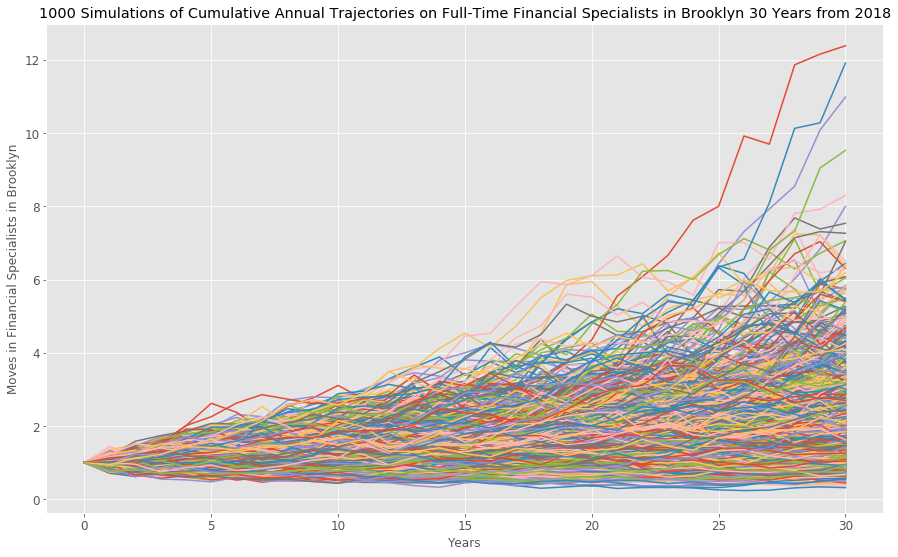

In [702]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_brooklyn = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Brooklyn 30 Years from 2018"
brooklyn_employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Brooklyn')
plt.show()

In [703]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves_brooklyn = brooklyn_employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves_brooklyn.head()

0    4.301525
1    3.002069
2    1.440173
3    0.783159
4    0.979310
Name: 30, dtype: float64

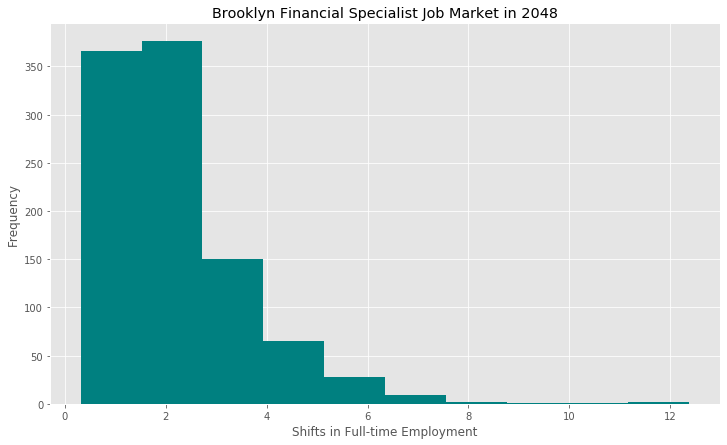

In [748]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_brooklyn = plt.figure()
ending_cumulative_moves_brooklyn.plot(kind='hist', bins=10, color = 'Teal', 
                             title='Brooklyn Financial Specialist Job Market in 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [705]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_brooklyn = ending_cumulative_moves_brooklyn.quantile(q=[0.025, 0.975])
confidence_interval_brooklyn

0.025    0.639962
0.975    5.763166
Name: 30, dtype: float64

In [862]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative employment ranges
ending_cumulative_moves_brooklyn.value_counts(bins=10) / len(ending_cumulative_moves_brooklyn)

(1.517, 2.724]      0.376
(0.297, 1.517]      0.366
(2.724, 3.931]      0.150
(3.931, 5.138]      0.065
(5.138, 6.345]      0.028
(6.345, 7.552]      0.009
(11.174, 12.381]    0.002
(7.552, 8.76]       0.002
(9.967, 11.174]     0.001
(8.76, 9.967]       0.001
Name: 30, dtype: float64

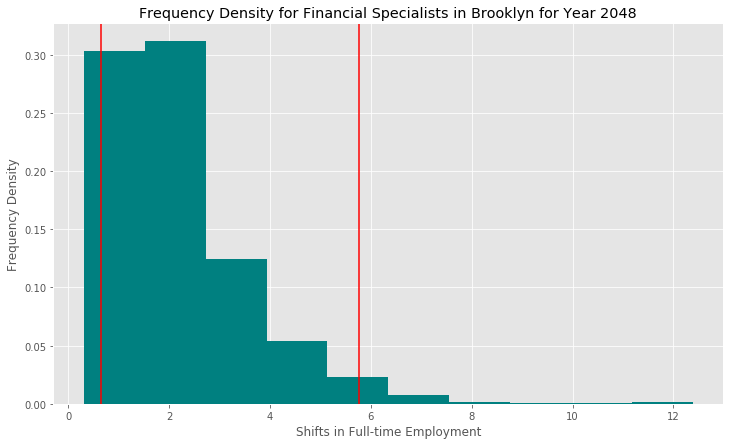

In [863]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
hist_cum_moves_brooklyn = plt.figure()
ending_cumulative_moves_brooklyn.plot(kind='hist', density=True, bins=10, color = 'teal', 
                             title='Frequency Density for Financial Specialists in Brooklyn for Year 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_brooklyn.iloc[0], color='red')
plt.axvline(confidence_interval_brooklyn.iloc[1], color='red')
plt.show()

In [859]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves_brooklyn = brooklyn_employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves_brooklyn.head()

0    0.987378
1    0.865945
2    0.862732
3    1.242238
4    1.558927
Name: 11, dtype: float64

In [861]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval_brooklyn = tenth_cumulative_moves_brooklyn.quantile(q=[0.025, 0.975])
tenth_confidence_interval_brooklyn

0.025    0.608629
0.975    2.500378
Name: 11, dtype: float64

In [864]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative employment ranges
tenth_cumulative_moves_brooklyn.value_counts(bins=10) / len(tenth_cumulative_moves_brooklyn)

(0.971, 1.225]    0.249
(1.225, 1.479]    0.213
(0.717, 0.971]    0.171
(1.479, 1.733]    0.137
(1.733, 1.987]    0.082
(0.459, 0.717]    0.065
(1.987, 2.241]    0.037
(2.241, 2.495]    0.020
(2.495, 2.749]    0.017
(2.749, 3.003]    0.009
Name: 11, dtype: float64

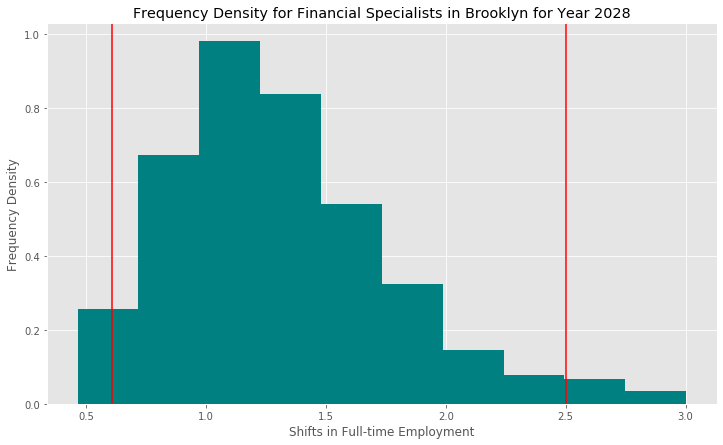

In [865]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
hist_tenth_cum_moves_brooklyn = plt.figure()
tenth_cumulative_moves_brooklyn.plot(kind='hist', density=True, bins=10, color = 'teal', 
                             title='Frequency Density for Financial Specialists in Brooklyn for Year 2028', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval_brooklyn.iloc[0], color='red')
plt.axvline(tenth_confidence_interval_brooklyn.iloc[1], color='red')
plt.show()

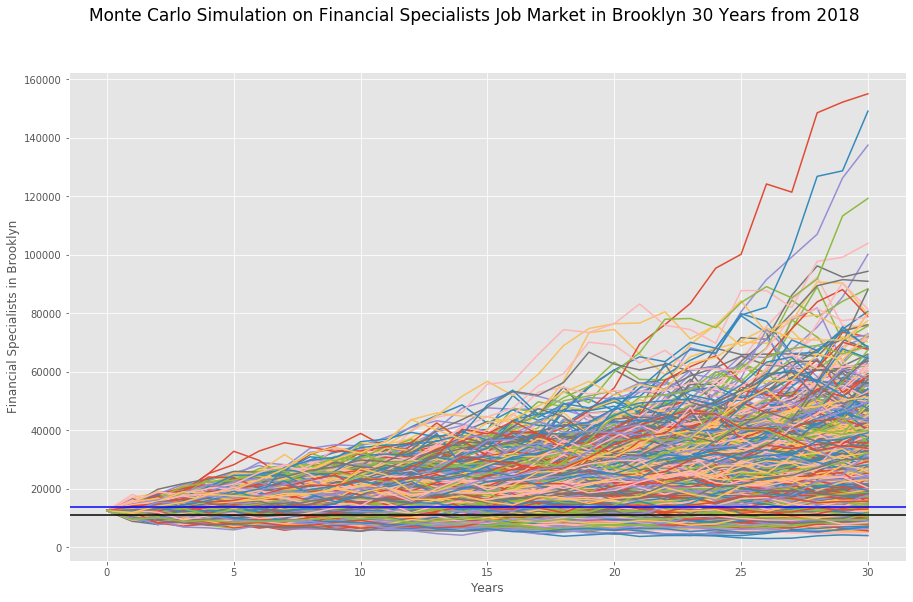

In [791]:
# Set initial employment
initial_employment_brooklyn = 0.5*(financial_brooklyn_male_last + financial_brooklyn_female_last)

# Plot scaled monte-carlo simulation for Brooklyn job market
fig_finance_brooklyn = plt.figure(figsize=(15,9))
fig_finance_brooklyn.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Brooklyn 30 Years from 2018', fontsize=17)
plt.plot(brooklyn_employed_cumulative_moves * initial_employment_brooklyn)
plt.axhline(y = financial_brooklyn_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_brooklyn_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Brooklyn')
plt.show()

In [793]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound_brooklyn = initial_employment_brooklyn * confidence_interval_brooklyn.iloc[0]
employment_gnl_upper_bound_brooklyn = initial_employment_brooklyn * confidence_interval_brooklyn.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_brooklyn:,.0f} in financial specialists"
      f" in Brooklyn over the next 30 years will end within in the range of"
      f" {employment_gnl_lower_bound_brooklyn:,.0f} and {employment_gnl_upper_bound_brooklyn:,.0f}.")

There is a 95% chance that an initial employment of 12,521 in financial specialists in Brooklyn over the next 30 years will end within in the range of 8,013 and 72,161.


In [794]:
employed_trajectories_brooklyn = initial_employment_brooklyn * brooklyn_employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories_brooklyn.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories_brooklyn

Lower 5%        Median      Upper 5%
0   12521.000000  12521.000000  12521.000000
1   10655.507065  12791.779509  15162.101027
2   10040.869155  13192.611205  16529.319999
3    9736.819997  13423.664016  17880.232293
4    9499.405246  13771.515766  18963.634460
5    9317.940067  14095.044322  20564.439200
6    9022.759544  14244.291434  21789.180746
7    8834.783567  14586.713080  22812.688498
8    8856.140989  14696.665343  23966.941898
9    8793.721620  15293.008436  25469.308106
10   8651.383643  15490.161402  26100.349570
11   8453.554177  15499.704759  27818.694975
12   8554.268226  15935.604535  29042.529055
13   8703.454421  16272.791931  30753.862359
14   8694.448477  16521.870107  32732.048451
15   8606.285016  16928.339606  34418.113099
16   8463.056835  17368.949614  35590.215067
17   8719.856153  17785.955781  36130.108773
18   8715.607492  18140.541505  37643.735987
19   8546.766141  18284.411244  39116.677352
20   8530.428015  18591.189730  40454.770809
21   8721.455381  19077.610409  43038.885351
22   8566.617325  19566.551959  44774.180594
23   8933.660307  20005.536550  47312.545352
24   8752.738743  20380.787145  48649.356722
25   8741.698556  20603.672047  50481.818107
26   8839.404487  21246.586767  52875.465713
27   8705.442936  21920.536191  55720.126015
28   8943.738488  22634.910967  56864.406990
29   9042.813752  22862.961820  59140.049099
30   9031.378776  23104.816457  61258.766499

<Figure size 432x288 with 0 Axes>

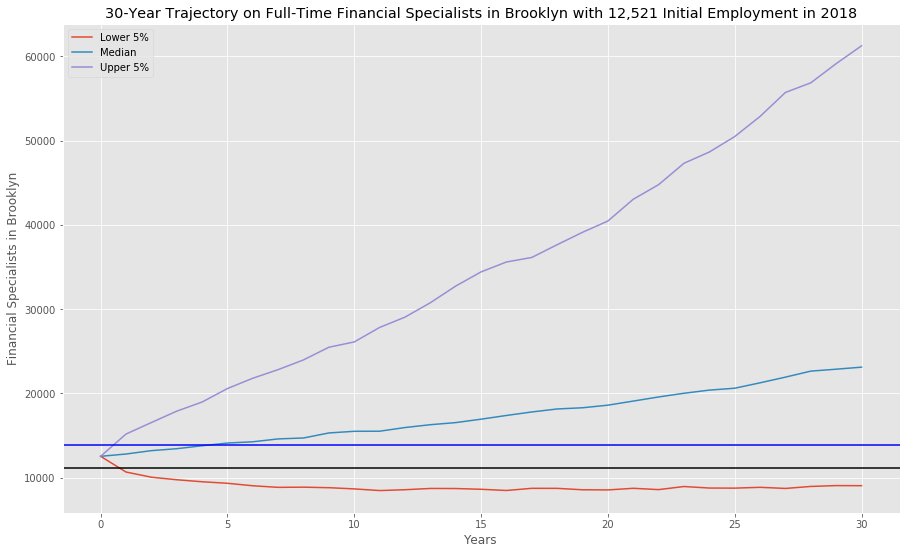

In [795]:
ax_cum_employed_brooklyn = plt.figure()
employed_trajectories_brooklyn.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Brooklyn with 12,521 Initial Employment in 2018",
                          figsize=(15, 9))
plt.axhline(y = financial_brooklyn_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_brooklyn_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Brooklyn')
plt.show()

### Monte Carlo Simulation on Full-Time Financial Specialists in Queens Over 30 Years Starting from 2018

In [716]:
df_queens = financial_specialists_Queens
df_queens

Financial_specialists_male  \
County Year Name                                                  
081    2010 Queens County, New York                     12474.0   
       2011 Queens County, New York                     12283.0   
       2012 Queens County, New York                     12352.0   
       2013 Queens County, New York                     12428.0   
       2014 Queens County, New York                     11948.0   
       2015 Queens County, New York                     13864.0   
       2016 Queens County, New York                     12805.0   
       2017 Queens County, New York                     14777.0   
       2018 Queens County, New York                     11494.0   

                                     Financial_specialists_female  
County Year Name                                                   
081    2010 Queens County, New York                       13008.0  
       2011 Queens County, New York                       12396.0  
       2012 Queens County, New York                       12281.0  
       2013 Queens County, New York                       14374.0  
       2014 Queens County, New York                       13265.0  
       2015 Queens County, New York                       14109.0  
       2016 Queens County, New York                       13697.0  
       2017 Queens County, New York                       13611.0  
       2018 Queens County, New York                       13281.0

In [717]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_queens = df_queens.pct_change().fillna(0)
annual_moves_queens

Financial_specialists_male  \
County Year Name                                                  
081    2010 Queens County, New York                    0.000000   
       2011 Queens County, New York                   -0.015312   
       2012 Queens County, New York                    0.005618   
       2013 Queens County, New York                    0.006153   
       2014 Queens County, New York                   -0.038622   
       2015 Queens County, New York                    0.160362   
       2016 Queens County, New York                   -0.076385   
       2017 Queens County, New York                    0.154002   
       2018 Queens County, New York                   -0.222170   

                                     Financial_specialists_female  
County Year Name                                                   
081    2010 Queens County, New York                      0.000000  
       2011 Queens County, New York                     -0.047048  
       2012 Queens County, New York                     -0.009277  
       2013 Queens County, New York                      0.170426  
       2014 Queens County, New York                     -0.077153  
       2015 Queens County, New York                      0.063626  
       2016 Queens County, New York                     -0.029201  
       2017 Queens County, New York                     -0.006279  
       2018 Queens County, New York                     -0.024245

In [718]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_financial_queens_male = annual_moves_queens.mean()['Financial_specialists_male']
avg_annual_moves_financial_queens_female = annual_moves_queens.mean()['Financial_specialists_female']
avg_annual_moves_financial_queens_male

-0.0029282782346636343

In [719]:
avg_annual_moves_financial_queens_female

0.004538725855711283

In [720]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_queens_male = annual_moves_queens.std()['Financial_specialists_male']
std_dev_annual_moves_financial_queens_female = annual_moves_queens.std()['Financial_specialists_female']
std_dev_annual_moves_financial_queens_male

0.11529577070807671

In [721]:
std_dev_annual_moves_financial_queens_female

0.07300685227824968

In [723]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_queens_male_last  = df_queens['Financial_specialists_male'][-1]
financial_queens_female_last = df_queens['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_queens_employed_df = pd.DataFrame()
queens_employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_queens_male = []
    simulated_financial_specialist_queens_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_queens_male = [financial_queens_male_last]
    simulated_financial_specialists_queens_female = [financial_queens_female_last]
    
            
    # Calculate the simulated price using the last price within the list
#    simulated_financial_specialist_queens_male = simulated_financial_specialists_queens_male[-1] * (1 + np.random.normal(avg_annual_moves_financial_queens_male, std_dev_annual_moves_financial_queens_male))
 #   simulated_financial_specialist_queens_female = simulated_financial_specialists_queens_female[-1] * (1 + np.random.normal(avg_annual_moves_financial_queens_female, std_dev_annual_moves_financial_queens_female))

    # Append the simulated price to the list
#    simulated_financial_specialists_queens_male.append(simulated_financial_specialist_queens_male)
#    simulated_financial_specialists_queens_female.append(simulated_financial_specialist_queens_female)

    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_queens_male = simulated_financial_specialists_queens_male[count] * (1 + np.random.normal(avg_annual_moves_financial_brooklyn_male, std_dev_annual_moves_financial_brooklyn_male))
        simulated_financial_specialist_queens_female = simulated_financial_specialists_queens_female[count] * (1 + np.random.normal(avg_annual_moves_financial_brooklyn_female, std_dev_annual_moves_financial_brooklyn_female))

        simulated_financial_specialists_queens_male.append(simulated_financial_specialist_queens_male)
        simulated_financial_specialists_queens_female.append(simulated_financial_specialist_queens_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_queens_employed_df['Financial_specialists_male'] = simulated_financial_specialists_queens_male
    simulated_queens_employed_df['Financial_specialists_female'] = simulated_financial_specialists_queens_female
    
    # Calculate the daily returns of simulated prices
    simulated_queens_employed_moves = simulated_queens_employed_df.pct_change()
    
    # Set the portfolio weights (50% male; 50% female)
    weights = [0.5, 0.5]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    queens_employed_annual_moves = simulated_queens_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    queens_employed_cumulative_moves[n] = (1 + queens_employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
queens_employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   0.854352  0.982670  1.057317  1.085617  1.025881  1.013269  0.823180   
2   0.875006  0.942181  1.128921  1.024760  0.961667  1.041842  0.705938   
3   0.898647  1.004384  1.204350  0.852334  1.047635  0.896720  0.760703   
4   1.107511  0.948195  1.254195  0.827549  1.117320  0.982754  0.919493   
5   1.420827  0.790410  1.293205  0.870987  0.939930  1.153800  0.913134   
6   1.226494  0.848889  1.352331  0.853769  0.933300  1.095863  1.069601   
7   1.189082  0.872719  1.089135  0.948132  1.129351  1.183708  0.937011   
8   1.242811  1.033744  1.160183  0.931962  1.005950  1.201430  0.853034   
9   1.238890  1.090823  1.207193  1.004519  1.001290  1.153237  0.924054   
10  1.419273  1.147776  1.376212  1.100500  1.043429  1.219206  0.776555   
11  1.390679  1.393768  1.223037  1.192915  1.152447  1.140733  0.849274   
12  1.518883  1.631456  1.048990  1.192189  1.206947  1.228618  0.956544   
13  1.789768  2.002453  1.047119  1.210266  1.341027  1.404683  1.084556   
14  1.739935  2.332075  1.055559  1.422790  1.296783  1.614700  1.203800   
15  1.709936  2.322509  1.076686  1.630999  1.320065  1.695237  1.400520   
16  1.794709  2.543446  1.381686  1.809121  1.467188  1.808918  1.550911   
17  1.840299  2.391662  1.012445  2.189211  1.655715  2.281841  1.789270   
18  2.151207  2.276177  0.929334  2.257720  1.647330  2.482016  1.846741   
19  2.161235  2.508343  0.960766  2.397931  1.578427  2.141486  1.960445   
20  2.399042  2.787429  1.046127  2.776222  1.658833  2.160016  2.010438   
21  2.394291  3.227559  0.915897  2.457213  1.440679  2.036675  2.184847   
22  2.315983  3.330563  1.048628  2.518835  1.114931  2.132046  1.957233   
23  2.290021  3.303056  1.022262  2.670681  1.149260  2.251836  1.909011   
24  2.227011  3.486019  1.123207  2.963007  0.807519  2.419211  1.676336   
25  2.250166  3.733330  1.101160  3.089525  0.701791  2.513233  2.050266   
26  2.550064  3.213545  0.883618  2.675014  0.656880  2.425106  1.726510   
27  2.691745  2.786041  1.035532  2.636168  0.863414  2.323380  1.851756   
28  2.685096  3.027275  0.959196  2.449870  0.980813  2.524320  1.665715   
29  2.747057  3.292694  0.884811  2.967288  1.078552  2.406215  1.637373   
30  2.705171  3.546097  0.910467  2.910258  0.970395  2.528721  1.794281   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.957057  0.897614  0.927158  ...  1.215782  0.910633  1.021659  0.934534   
2   0.812675  1.006185  0.882394  ...  1.307011  1.155152  0.809277  1.093441   
3   0.976189  0.980473  0.913818  ...  1.491621  1.115697  0.861804  1.117913   
4   1.181052  1.109104  1.142750  ...  1.654001  1.163442  0.996912  1.081695   
5   1.164515  1.148896  1.207424  ...  1.817311  1.409320  0.968033  1.122037   
6   1.296016  1.296754  1.118227  ...  1.733339  1.321886  1.075856  1.013180   
7   1.291984  1.258823  1.106084  ...  1.570317  1.426742  1.169470  1.114396   
8   1.222752  1.507182  0.945472  ...  1.521433  1.312907  1.357342  1.352168   
9   1.275750  1.366944  1.054005  ...  1.487306  1.411743  1.348795  1.210186   
10  1.322006  1.199540  1.226878  ...  1.506514  1.260587  1.343999  1.217850   
11  1.124663  1.274581  1.304196  ...  1.460093  1.305798  1.379927  1.143912   
12  1.154594  1.401370  1.445026  ...  1.287618  1.266965  1.564213  1.339604   
13  1.256355  1.436652  1.403020  ...  1.343034  1.322052  1.562356  1.444014   
14  1.249029  1.387996  1.239793  ...  1.287494  1.187971  1.672241  1.497251   
15  1.325411  1.652180  1.289048  ...  1.420229  1.162550  1.630759  1.549546   
16  1.335428  1.445925  1.335665  ...  1.177867  1.349844  1.675492  1.745080   
17  1.313148  1.659641  1.356485  ...  1.130357  1.178283  1.607003  1.869843   
18  1.574972  1.984084  1.504410  ...

<Figure size 432x288 with 0 Axes>

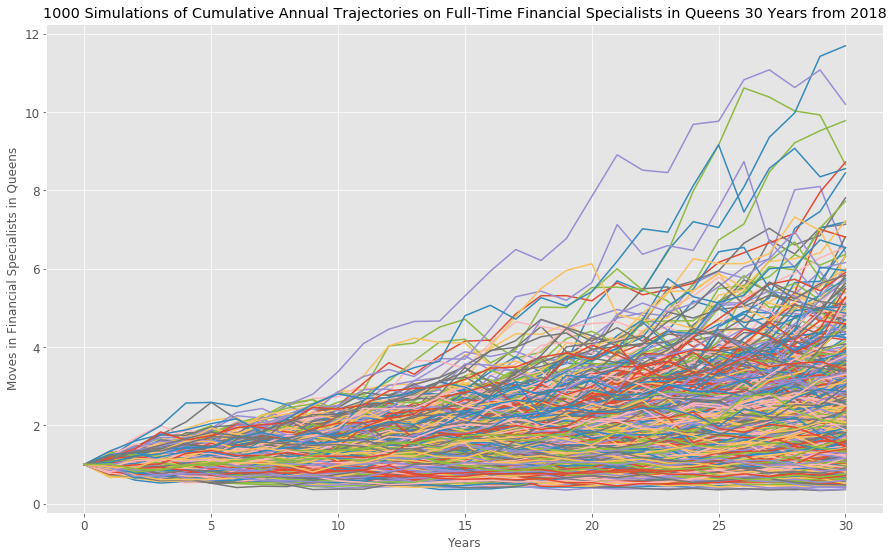

In [732]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_queens = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Queens 30 Years from 2018"
queens_employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Queens')
plt.show()

In [745]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves_queens = queens_employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves_queens.head()

0    2.705171
1    3.546097
2    0.910467
3    2.910258
4    0.970395
Name: 30, dtype: float64

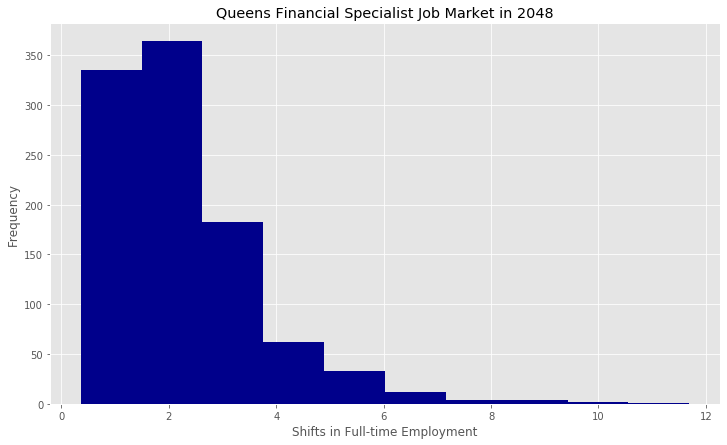

In [760]:
# Use the `plot` function to plot a frequency distribution of simulated ending employment
fig_hist_queens = plt.figure()
ending_cumulative_moves_queens.plot(kind='hist', bins=10, color = 'darkblue', 
                             title='Queens Financial Specialist Job Market in 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [749]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_queens = ending_cumulative_moves_queens.quantile(q=[0.025, 0.975])
confidence_interval_queens

0.025    0.640240
0.975    5.949318
Name: 30, dtype: float64

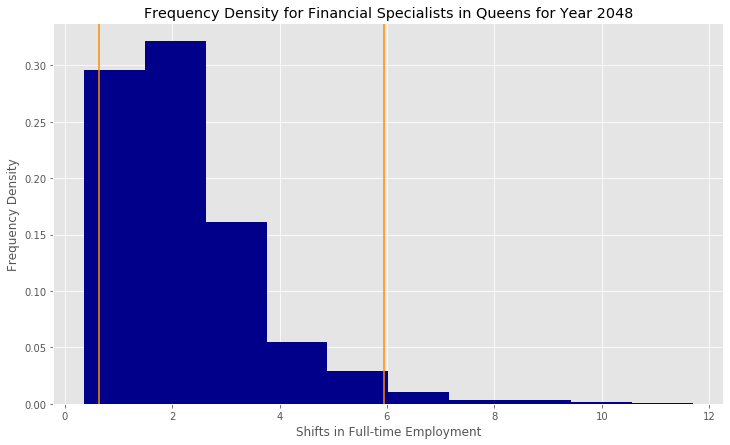

In [771]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves_queens = plt.figure()
ending_cumulative_moves_queens.plot(kind='hist', density=True, bins=10, color = 'darkblue', 
                             title='Frequency Density for Financial Specialists in Queens for Year 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_queens.iloc[0], color='darkorange')
plt.axvline(confidence_interval_queens.iloc[1], color='darkorange')
plt.show()

In [867]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves_queens = employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves_queens.head()

0    1.105486
1    0.958296
2    0.859565
3    0.842589
4    0.549296
Name: 11, dtype: float64

In [868]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval_queens = tenth_cumulative_moves_queens.quantile(q=[0.025, 0.975])
tenth_confidence_interval_queens

0.025    0.504678
0.975    1.489110
Name: 11, dtype: float64

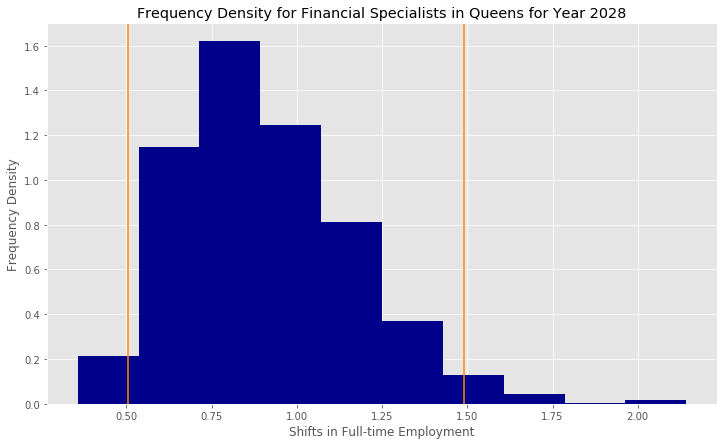

In [869]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_tenth_cum_moves_queens = plt.figure()
tenth_cumulative_moves_queens.plot(kind='hist', density=True, bins=10, color = 'darkblue', 
                             title='Frequency Density for Financial Specialists in Queens for Year 2028', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval_queens.iloc[0], color='darkorange')
plt.axvline(tenth_confidence_interval_queens.iloc[1], color='darkorange')
plt.show()

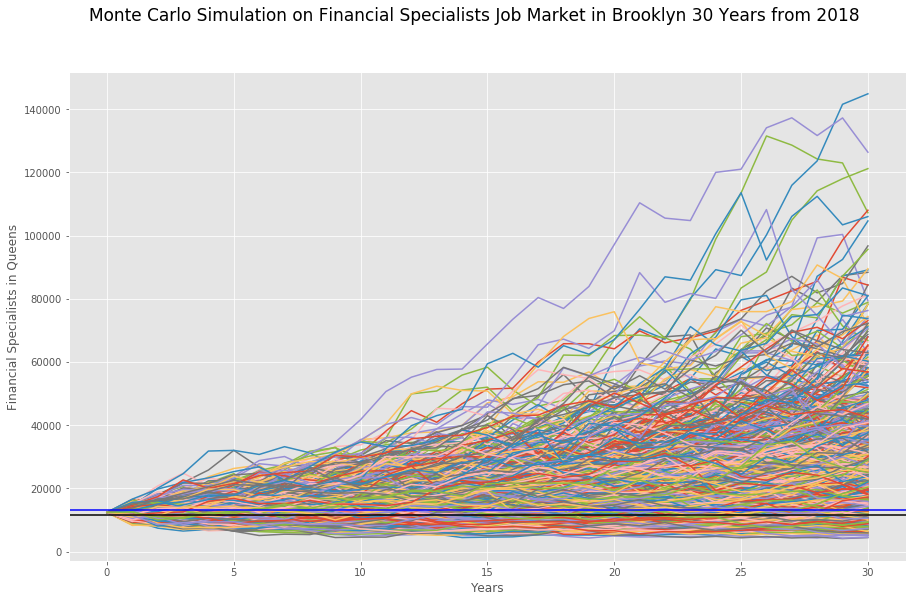

In [806]:
# Set initial employment
initial_employment_queens = 0.5*(financial_queens_male_last + financial_queens_female_last)

fig_finance_queens = plt.figure(figsize=(15,9))
fig_finance_queens.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Brooklyn 30 Years from 2018', fontsize=17)
plt.plot(queens_employed_cumulative_moves * initial_employment_queens)
plt.axhline(y = financial_queens_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_queens_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Queens')
plt.show()

In [797]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound_queens = initial_employment_queens * confidence_interval_queens.iloc[0]
employment_gnl_upper_bound_queens = initial_employment_queens * confidence_interval_queens.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_queens:,.0f} in financial specialists"
      f" in Queens over the next 30 years will end within in the range of"
      f" {employment_gnl_lower_bound_queens:,.0f} and {employment_gnl_upper_bound_queens:,.0f}.")

There is a 95% chance that an initial employment of 12,388 in financial specialists in Queens over the next 30 years will end within in the range of 7,931 and 73,697.


In [801]:
employed_trajectories_queens = initial_employment_queens * queens_employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories_queens.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories_queens

Lower 5%        Median      Upper 5%
0   12387.500000  12387.500000  12387.500000
1   10426.604620  12703.775809  14721.376994
2    9779.023868  12913.258242  16070.177773
3    9494.093808  13153.675837  17429.484364
4    9441.132095  13488.218576  18826.659805
5    9058.140752  13885.994737  20062.981608
6    9143.434092  14066.335397  21137.415106
7    9076.464392  14480.440257  21935.429631
8    8883.472615  14785.848042  23258.322548
9    8671.329226  15134.116296  24403.238654
10   8700.164707  15478.487521  26341.639762
11   8712.927800  15900.571385  27374.059470
12   8543.047967  15970.847841  28390.585159
13   8229.174408  16286.289237  29467.112888
14   8537.014032  16770.578343  31703.223181
15   8710.157891  16974.371610  32652.071872
16   8687.231082  17298.941008  33940.460375
17   8902.135741  17834.769486  36179.951785
18   8613.825408  18296.146525  37120.772196
19   8621.380919  18508.880102  38927.507402
20   8598.661783  18860.570579  41469.239056
21   8535.171870  19152.405279  43059.078476
22   8574.473956  19580.374895  44394.545437
23   8465.841197  20283.938023  46387.913159
24   8701.463589  20139.400924  47896.456532
25   8692.065607  20624.003001  49717.468828
26   8986.592315  21495.370259  50473.584998
27   9179.677489  22038.898987  54305.373888
28   9135.665149  22401.580276  56974.092033
29   9303.002205  23021.068715  60132.614989
30   9415.997546  23792.437899  62668.312748

<Figure size 432x288 with 0 Axes>

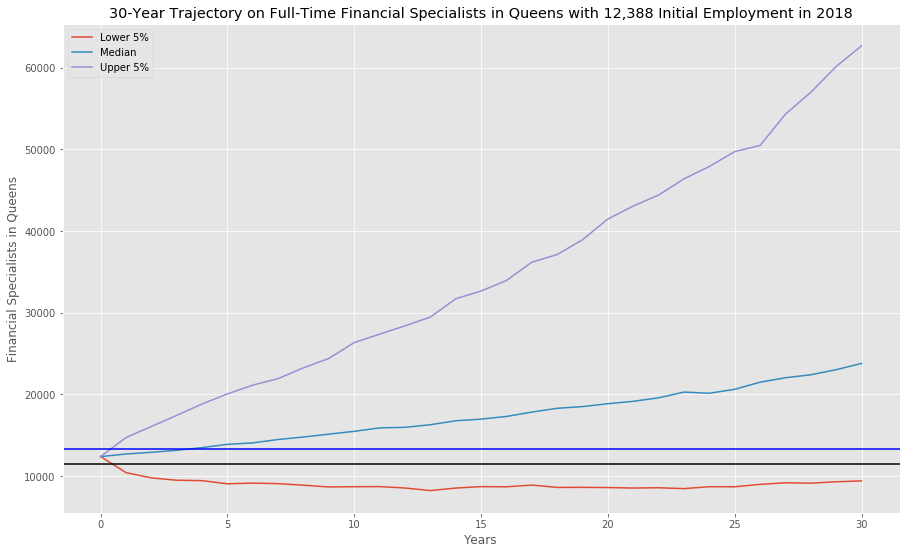

In [804]:
ax_cum_employed_queens = plt.figure()
employed_trajectories_queens.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Queens with 12,388 Initial Employment in 2018",
                          figsize=(15, 9))
plt.axhline(y = financial_queens_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_queens_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Queens')
plt.show()

### Monte Carlo Simulation on Full-Time Financial Specialists in Staten Island Over 30 Years Starting from 2018

In [814]:
df_staten = financial_specialists_Staten_Island
df_staten

Financial_specialists_male  \
County Year Name                                                    
085    2010 Richmond County, New York                      2906.0   
       2011 Richmond County, New York                      3572.0   
       2012 Richmond County, New York                      2745.0   
       2013 Richmond County, New York                      3765.0   
       2014 Richmond County, New York                      3114.0   
       2015 Richmond County, New York                      2924.0   
       2016 Richmond County, New York                      3704.0   
       2017 Richmond County, New York                      3274.0   
       2018 Richmond County, New York                      3342.0   

                                       Financial_specialists_female  
County Year Name                                                     
085    2010 Richmond County, New York                        1931.0  
       2011 Richmond County, New York                        1964.0  
       2012 Richmond County, New York                        2989.0  
       2013 Richmond County, New York                        2190.0  
       2014 Richmond County, New York                        1606.0  
       2015 Richmond County, New York                        2988.0  
       2016 Richmond County, New York                        1802.0  
       2017 Richmond County, New York                        2378.0  
       2018 Richmond County, New York                        3495.0

In [815]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_staten = df_staten.pct_change().fillna(0)
annual_moves_staten

Financial_specialists_male  \
County Year Name                                                    
085    2010 Richmond County, New York                    0.000000   
       2011 Richmond County, New York                    0.229181   
       2012 Richmond County, New York                   -0.231523   
       2013 Richmond County, New York                    0.371585   
       2014 Richmond County, New York                   -0.172908   
       2015 Richmond County, New York                   -0.061015   
       2016 Richmond County, New York                    0.266758   
       2017 Richmond County, New York                   -0.116091   
       2018 Richmond County, New York                    0.020770   

                                       Financial_specialists_female  
County Year Name                                                     
085    2010 Richmond County, New York                      0.000000  
       2011 Richmond County, New York                      0.017090  
       2012 Richmond County, New York                      0.521894  
       2013 Richmond County, New York                     -0.267313  
       2014 Richmond County, New York                     -0.266667  
       2015 Richmond County, New York                      0.860523  
       2016 Richmond County, New York                     -0.396921  
       2017 Richmond County, New York                      0.319645  
       2018 Richmond County, New York                      0.469722

In [816]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_financial_staten_male = annual_moves_staten.mean()['Financial_specialists_male']
avg_annual_moves_financial_staten_female = annual_moves_staten.mean()['Financial_specialists_female']
avg_annual_moves_financial_staten_male

0.034084051475437804

In [817]:
avg_annual_moves_financial_staten_female

0.13977476125003532

In [818]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_staten_male = annual_moves_staten.std()['Financial_specialists_male']
std_dev_annual_moves_financial_staten_female = annual_moves_staten.std()['Financial_specialists_female']
std_dev_annual_moves_financial_staten_male

0.2098912804193371

In [819]:
std_dev_annual_moves_financial_staten_female

0.4272379980869996

In [833]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_staten_male_last  = df_staten['Financial_specialists_male'][-1]
financial_staten_female_last = df_staten['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_staten_employed_df = pd.DataFrame()
staten_employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_staten_male = []
    simulated_financial_specialist_staten_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_staten_male = [financial_staten_male_last]
    simulated_financial_specialists_staten_female = [financial_staten_female_last]
    
            
    # Calculate the simulated price using the last price within the list
#    simulated_financial_specialist_staten_male = simulated_financial_specialists_staten_male[-1] * (1 + np.random.normal(avg_annual_moves_financial_staten_male, std_dev_annual_moves_financial_staten_male))
#    simulated_financial_specialist_staten_female = simulated_financial_specialists_staten_female[-1] * (1 + np.random.normal(avg_annual_moves_financial_staten_female, std_dev_annual_moves_financial_staten_female))

    # Append the simulated price to the list
#    simulated_financial_specialists_staten_male.append(simulated_financial_specialist_staten_male)
#    simulated_financial_specialists_staten_female.append(simulated_financial_specialist_staten_female)

    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_staten_male = simulated_financial_specialists_staten_male[count] * (1 + np.random.normal(avg_annual_moves_financial_staten_male, std_dev_annual_moves_financial_staten_male))
        simulated_financial_specialist_staten_female = simulated_financial_specialists_staten_female[count] * (1 + np.random.normal(avg_annual_moves_financial_staten_female, std_dev_annual_moves_financial_staten_female))

        simulated_financial_specialists_staten_male.append(simulated_financial_specialist_staten_male)
        simulated_financial_specialists_staten_female.append(simulated_financial_specialist_staten_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_staten_employed_df['Financial_specialists_male'] = simulated_financial_specialists_staten_male
    simulated_staten_employed_df['Financial_specialists_female'] = simulated_financial_specialists_staten_female
    
    # Calculate the daily returns of simulated prices
    simulated_staten_employed_moves = simulated_staten_employed_df.pct_change()
    
    # Set the portfolio weights (50% male; 50% female)
    weights = [0.5, 0.5]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    staten_employed_annual_moves = simulated_staten_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    staten_employed_cumulative_moves[n] = (1 + staten_employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
staten_employed_cumulative_moves

0         1          2         3         4         5          6    \
0    1.000000  1.000000   1.000000  1.000000  1.000000  1.000000   1.000000   
1    0.641477  1.142026   1.255628  1.299407  1.449791  1.037086   1.158419   
2    1.045076  0.801552   1.297473  0.974517  1.175085  0.927266   1.500107   
3    1.639292  0.843109   1.166475  0.802478  1.326022  0.565862   1.694991   
4    2.217954  0.738542   1.359531  1.127747  1.640339  0.404728   1.499258   
5    2.606844  0.719040   1.678676  1.136826  1.573936  0.526934   1.400089   
6    2.553246  0.815702   1.839897  0.759348  1.861985  0.574535   1.515862   
7    2.958423  0.927820   2.175030  0.591027  1.118690  0.583213   1.516477   
8    3.986753  1.109538   1.924223  0.470888  0.939448  0.644294   1.622065   
9    5.837822  0.936816   2.201710  0.502532  1.421371  0.541854   2.316887   
10   7.099680  0.676638   2.449365  0.686476  2.198619  0.477848   1.966599   
11   9.292178  0.659322   2.699275  0.827401  0.912026  0.626453   2.235721   
12   7.246754  0.433730   3.514663  1.162514  1.002210  1.020255   2.459044   
13   8.516196  0.346052   3.646895  0.916121  1.246418  0.729706   2.626426   
14   9.875671  0.380676   3.169355  1.136915  1.324949  0.896170   2.749816   
15   6.351122  0.251652   3.442727  1.207242  1.569217  0.928110   3.681536   
16   6.839020  0.194288   3.568220  1.399855  1.655605  1.076792   4.189810   
17   8.502394  0.193355   3.724897  1.275480  2.510457  1.066665   4.295969   
18  11.048495  0.163397   5.327861  1.157887  2.585131  1.652160   4.943480   
19  15.715412  0.176335   7.115728  0.708026  3.016661  2.202941   5.639421   
20  18.251687  0.174811   7.168475  0.659973  3.411561  2.269861   8.108262   
21  16.643906  0.213053   8.940323  0.645266  4.351591  2.525440  11.361561   
22  15.481969  0.194420   9.696959  0.799327  5.248313  2.718244  11.490411   
23  17.161416  0.191612  16.195430  0.702056  7.431488  2.063504  15.065952   
24  19.831565  0.251799  18.565015  0.623239  6.998202  1.890916  22.369049   
25  22.729725  0.242571  16.670594  0.746193  7.841592  3.536336  20.399252   
26  33.933598  0.257750  23.673207  0.667713  6.029805  4.243914  15.912135   
27  36.838094  0.323303  24.631436  0.531152  7.318200  5.449206  22.550128   
28  37.361827  0.254611  25.811484  0.628824  7.899420  4.398347  28.518480   
29  39.245061  0.294065  30.144700  0.898749  4.984949  3.642818  27.687307   
30  47.839677  0.302612  20.720195  1.027301  4.509879  4.025469  31.697599   

         7         8          9    ...        990       991       992  \
0   1.000000  1.000000   1.000000  ...   1.000000  1.000000  1.000000   
1   0.893443  0.997598   1.089756  ...   1.286517  1.065120  0.916784   
2   1.247399  1.134394   1.408620  ...   1.636888  1.166752  1.337803   
3   1.842328  1.125544   1.428193  ...   1.587111  1.093517  1.508712   
4   1.905010  1.208094   1.878614  ...   1.569870  1.166731  1.697553   
5   1.011831  1.764273   1.604120  ...   2.555064  1.347282  1.860056   
6   1.174817  1.969576   2.132106  ...   3.645553  1.875432  2.079151   
7   1.132246  1.468941   2.017780  ...   4.291598  2.151457  2.040168   
8   1.313180  1.301184   2.721162  ...   4.630175  1.429079  2.066968   
9   1.142461  0.977803   3.639838  ...   4.054021  2.120046  1.340391   
10  1.442541  1.380009   4.860547  ...   4.376285  2.085652  1.137354   
11  1.172807  0.954640   5.741124  ...   4.339180  1.679196  1.292312   
12  1.292049  0.929945   6.866433  ...   4.426960  2.186535  1.157694   
13  1.034091  1.058210   8.074972  ...   4.380441  2.607554  1.602873   
14  0.951105  1.057025  11.707919  ...   4.878367  2.914712  1.450113   
15  0.918234  0.968634   8.621453  ...   5.186192  4.322404  1.144645   
16  1.114803  0.889686   7.987717  ...   6.955314  3.718161  1.469672   
17  1.302165  1.001993   4.455400  ...   9.816286  3.947753  1.671487   
18  1.413389  1.249071   4.732327  ...  10.034429  4.899969  2.508462   
19  1.736281  0.94724

<Figure size 432x288 with 0 Axes>

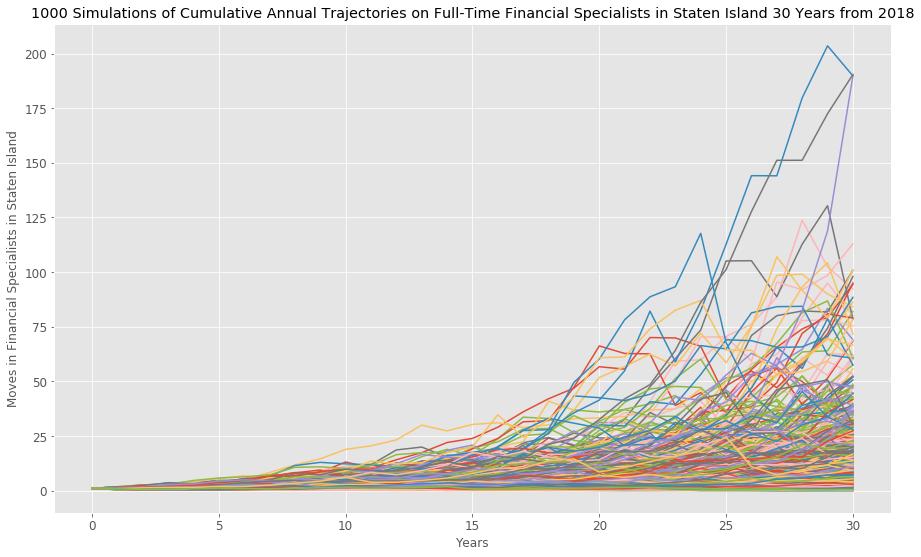

In [834]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_staten = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Staten Island 30 Years from 2018"
staten_employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Staten Island')
plt.show()

In [835]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves_staten = staten_employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves_staten.head()

0    47.839677
1     0.302612
2    20.720195
3     1.027301
4     4.509879
Name: 30, dtype: float64

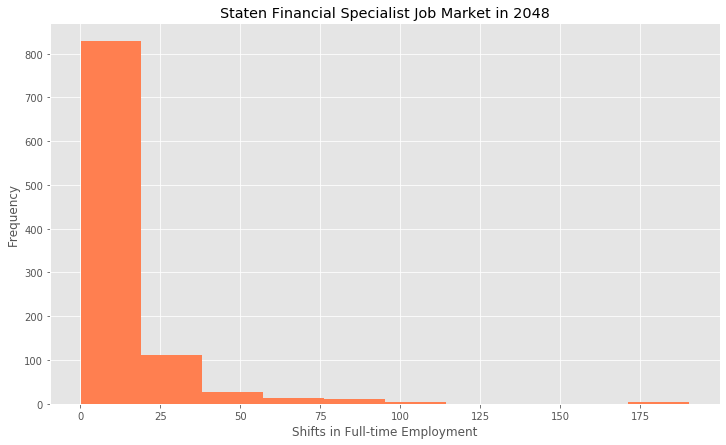

In [836]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_staten = plt.figure()
ending_cumulative_moves_staten.plot(kind='hist', bins=10, color = 'coral', 
                             title='Staten Financial Specialist Job Market in 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [837]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_staten = ending_cumulative_moves_staten.quantile(q=[0.025, 0.975])
confidence_interval_staten

0.025     0.453951
0.975    61.539096
Name: 30, dtype: float64

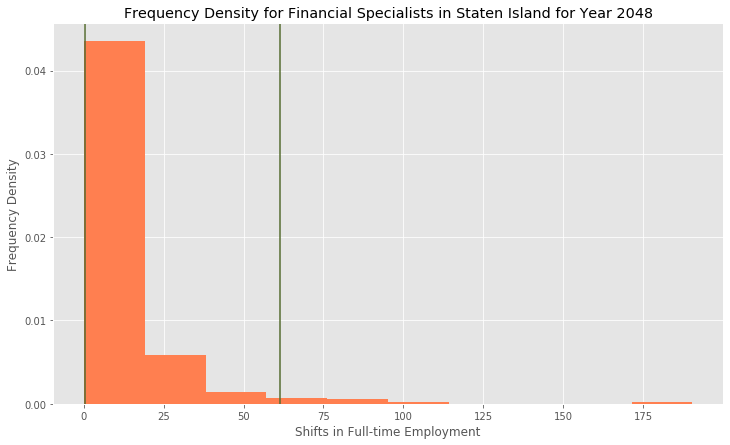

In [838]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves_staten = plt.figure()
ending_cumulative_moves_staten.plot(kind='hist', density=True, bins=10, color = 'coral', 
                             title='Frequency Density for Financial Specialists in Staten Island for Year 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_staten.iloc[0], color='darkolivegreen')
plt.axvline(confidence_interval_staten.iloc[1], color='darkolivegreen')
plt.show()

In [870]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves_staten = staten_employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves_staten.head()

0    9.292178
1    0.659322
2    2.699275
3    0.827401
4    0.912026
Name: 11, dtype: float64

In [871]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval_staten = tenth_cumulative_moves_staten.quantile(q=[0.025, 0.975])
tenth_confidence_interval_staten

0.025    0.368267
0.975    7.866261
Name: 11, dtype: float64

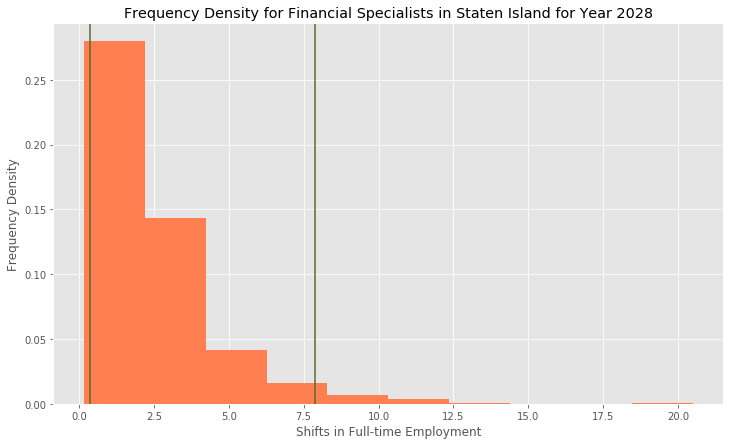

In [872]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_tenth_cum_moves_staten = plt.figure()
tenth_cumulative_moves_staten.plot(kind='hist', density=True, bins=10, color = 'coral', 
                             title='Frequency Density for Financial Specialists in Staten Island for Year 2028', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval_staten.iloc[0], color='darkolivegreen')
plt.axvline(tenth_confidence_interval_staten.iloc[1], color='darkolivegreen')
plt.show()

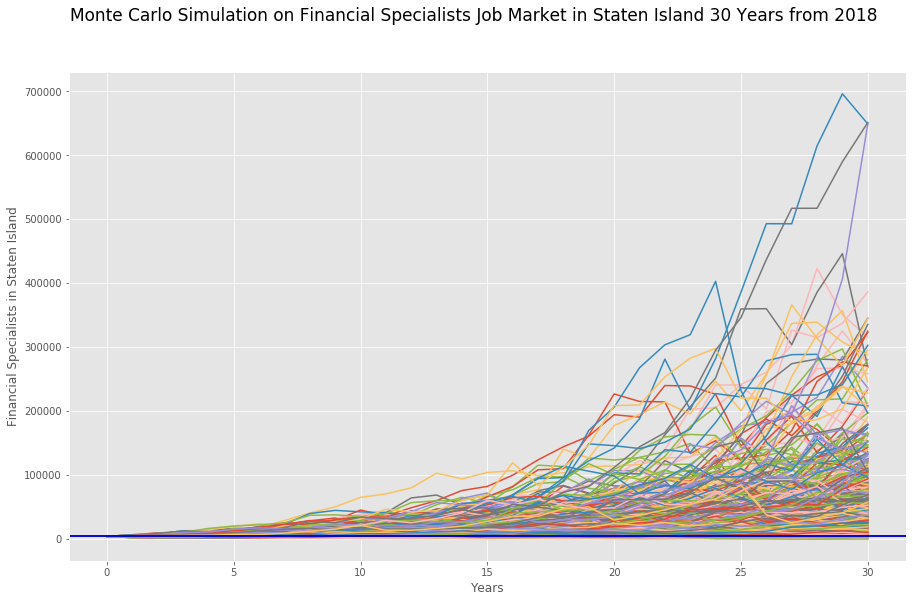

In [839]:
# Set initial employment
initial_employment_staten = 0.5*(financial_staten_male_last + financial_staten_female_last)

fig_finance_staten = plt.figure(figsize=(15,9))
fig_finance_staten.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Staten Island 30 Years from 2018', fontsize=17)
plt.plot(staten_employed_cumulative_moves * initial_employment_staten)
plt.axhline(y = financial_staten_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_staten_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Staten Island')
plt.show()

In [840]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound_staten = initial_employment_staten * confidence_interval_staten.iloc[0]
employment_gnl_upper_bound_staten = initial_employment_staten * confidence_interval_staten.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_staten:,.0f} in financial specialists"
      f" in Staten Island over the next 30 years will end within in the range of"
      f" {employment_gnl_lower_bound_staten:,.0f} and {employment_gnl_upper_bound_staten:,.0f}.")

There is a 95% chance that an initial employment of 3,418 in financial specialists in Staten Island over the next 30 years will end within in the range of 1,552 and 210,371.


In [841]:
employed_trajectories_staten = initial_employment_staten * staten_employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories_staten.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories_staten

Lower 5%        Median       Upper 5%
0   3418.500000   3418.500000    3418.500000
1   2442.051878   3751.928864    5065.004454
2   2167.388580   3988.541639    6392.594717
3   1980.517294   4278.747845    7426.212148
4   1802.651111   4510.263421    8920.493086
5   1751.056357   4773.203603   10055.599441
6   1792.814225   5049.706316   11609.110806
7   1640.171313   5356.850931   13387.376159
8   1636.617614   5634.647561   14722.584855
9   1668.857609   5904.915622   17187.238497
10  1714.094189   6369.791524   19592.791318
11  1721.852494   6695.353488   22345.312464
12  1802.390003   7181.612415   24004.691087
13  1649.057518   7561.928951   28731.255029
14  1735.376486   7711.186766   31316.962997
15  1639.903471   8137.323568   36032.791204
16  1687.223954   8556.379727   39261.919055
17  1818.961457   9134.133156   44131.546466
18  1792.434929   9686.410040   46470.684327
19  1805.890373  10327.682587   53827.839124
20  1754.533520  10945.306882   60633.327828
21  1893.248843  11654.564827   62324.354675
22  1920.223485  12052.301616   66167.456578
23  1835.138267  13158.909021   77163.821036
24  1777.126280  13787.586152   84824.248985
25  2063.311021  14576.911813   91452.368055
26  2237.651476  14952.849472  103216.610122
27  2060.210587  16253.564529  114197.328112
28  2029.295573  17320.965643  125351.174448
29  2143.817195  18331.178186  134223.689269
30  2434.832728  19362.227188  146618.089777

<Figure size 432x288 with 0 Axes>

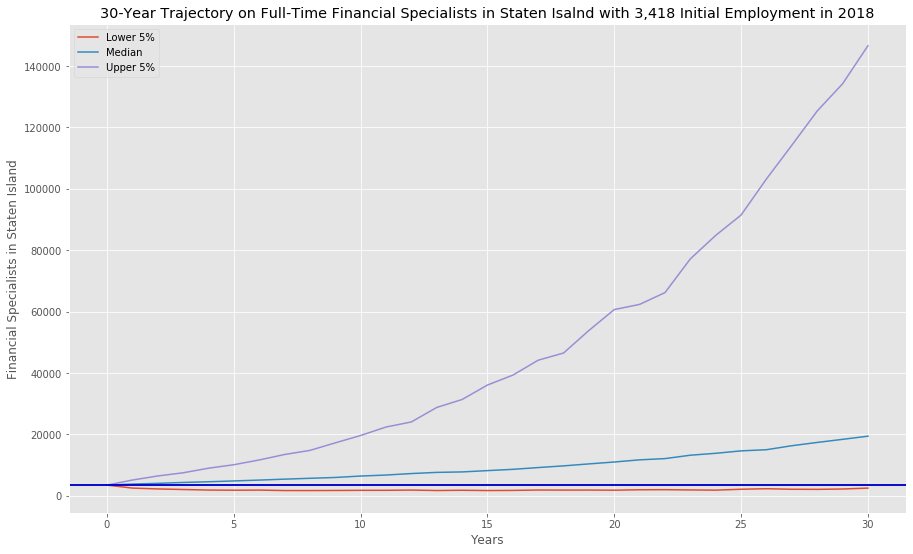

In [842]:
ax_cum_employed_staten = plt.figure()
employed_trajectories_staten.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Staten Isalnd with 3,418 Initial Employment in 2018",
                          figsize=(15, 9))
plt.axhline(y = financial_staten_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_staten_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Staten Island')
plt.show()

## Software Developers

In [ ]:
df_software_manhattan = employed_software_devops_Manhattan
df